<h1><center style="font-family:newtimeroman;font-size:150%; border-radius:50px; padding: 20px; color: yellow; background-color: black">Bioinformatics-Influenza complete genome analysis segment from 1 to 8</center></h1>
<center><img style="border-radius: 20px 20px 20px 20px" src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQGBk-4Ek4ySSf1Cat6hPM-dlA7_DqXV-2reA&s' height=500px width=900px border-radius=55%></center><br>

<div style="border-radius:50px; padding: 20px; background-color: black; font-size:120%; text-align:left">

<h3 align="left"><font color= white >About notebook and data:</font></h3>
    
<p><font color=#fffb00>
Influenza, also referred to as the flu, is a respiratory disease that is spread by influenza viruses. It can be minor or severe, and in certain situations, it can cause major problems. Getting vaccinated against influenza every year is the strongest defense against it. 

In this notebook, using the BioPython package, it was first extracted from the NCBI and then analyzed.

<font color='#fffb00'>
        <ul>
            <li>
               <a href="https://www.ncbi.nlm.nih.gov/nuccore/HE589463.1">Segment 1</a>
            </li>
            <li>
                   <a href="https://www.ncbi.nlm.nih.gov/nuccore/HE589464.1">Segment 2</a> 
           </li> 
            <li>
                   <a href="https://www.ncbi.nlm.nih.gov/nuccore/HE589465.1">Segment 3</a>
            </li> 
            <li>
                   <a href="https://www.ncbi.nlm.nih.gov/nuccore/HE589466.1">Segment 4</a>
            </li>
            <li>
                <a href="https://www.ncbi.nlm.nih.gov/nuccore/HE584757.1">Segment 5</a>
            </li>
            <li>
                    <a href="https://www.ncbi.nlm.nih.gov/nuccore/HE589468.1">Segment 6</a>
           </li> 
            <li>
                   <a href="https://www.ncbi.nlm.nih.gov/nuccore/HE589469.1">Segment 7</a>
            </li> 
            <li>
                   <a href="https://www.ncbi.nlm.nih.gov/nuccore/HE589470.1">Segment 8</a>
            </li>
        </ul>
 </font>
</font></p>

 <center><button type="button"><a href="https://www.ncbi.nlm.nih.gov">NCBI website</a></button><center
                                                                           

  

# <p style="background-color:black; font-family:calibri; color:#fffb00; font-size:170%; text-align:center; border-radius:30px 30px;">1. The First Step | Import library</p>

In [1]:
pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 36.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install collection

  Preparing metadata (setup.py) ... done
  Created wheel for collection: filename=collection-0.1.6-py3-none-any.whl size=5098 sha256=9fd1ec568a3a39bc3802bbc29274286b7456349fda00fbc7618e29bc9e369ea6
  Stored in directory: /root/.cache/pip/wheels/1c/b3/7a/6dd2fd1aa32817819c8c91da9a6b5919148da6eb5855ab0986
Successfully built collection
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Filter warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import library
from Bio import Entrez, SeqIO # Extract info from NCBI
from Bio.SeqUtils import molecular_weight # Molecular weight
from Bio.SeqUtils import gc_fraction # GC content
import matplotlib.pyplot as plt # Visualization
import numpy as np # numpy
from collections import Counter # Counter

# <p style="background-color:black; font-family:calibri; color:#fffb00; font-size:170%; text-align:center; border-radius:30px 30px;">2. The Second Step | Search In NCBI And Extracte Data</p>

In [5]:
# Error handling
class URLError(Exception):
    """Custom exception for URL errors."""
    pass
class InvalidIDError(Exception):
    """Custom exception for invalid ID errors."""
    pass
class InvalidFormatError(Exception):
    """Custom exception for invalid format errors."""
    pass
class InvalidEmailError(Exception):
    """Custom exception for invalid email errors."""
    pass
class InvalidDatabaseError(Exception):
    """Custom exception for invalid database errors."""
    pass
class InvalidTermError(Exception):
    """Custom exception for invalid term errors."""
    pass
class InvalidRetMaxError(Exception):
    """Custom exception for invalid retmax errors."""
    pass
class InvalidRetStartError(Exception):
    """Custom exception for invalid retstart errors."""
    pass
class InvalidRetModeError(Exception):
    """Custom exception for invalid retmode errors."""
    pass
class InvalidRetTypeError(Exception):
    """Custom exception for invalid rettype errors."""
    pass
class InvalidRetMaxError(Exception):
    """Custom exception for invalid retmax errors."""
    pass
class InvalidRetStartError(Exception):
    """Custom exception for invalid retstart errors."""
    pass
class InvalidRetModeError(Exception):
    """Custom exception for invalid retmode errors."""
    pass

In [6]:
# check flu spell of key word
try:
    Entrez.email = "seyedmilad.hashemichepi@gmail.com" # You should always tell NCBI who you are.
    handle = Entrez.espell(term="infulanza",db="pubmed") # search term
    record = Entrez.read(handle)
except URLError: # handle errors
    print("Please check your internet connection or the URL you are trying to access.")
except InvalidIDError:
     print("Please check the ID you are trying to access.")
except InvalidDatabaseError:
    print("Please check the database you are trying to access.")
except InvalidEmailError:
    print("Please check the email you are trying to access.")
except InvalidTermError:
    print("Please check the term you are trying to access.")
finally: # close the handle
    handle.close()
# print the result
print(f'incorrect spell is "{record["Query"]}" and correct spell is "{record["CorrectedQuery"]}" and searched in {record["Database"]} db"')

incorrect spell is "infulanza" and correct spell is "influenza" and searched in pubmed db"


In [7]:
# Search flu in  nocleotide data base
try:
    Entrez.email = "seyedmilad.hashemichepi@gmail.com" # You should say how you are.
    handle = Entrez.esearch(db="nucleotide", term="influenza", retmax=100) # Search in the nucleotode database for a specific Gene. 
    result = Entrez.read(handle) # Read.
# handle errors
except URLError: 
    print("Please check your internet connection or the URL you are trying to access.")
except InvalidIDError:
     print("Please check the ID you are trying to access.")
except InvalidDatabaseError:
    print("Please check the database you are trying to access.")
except InvalidEmailError:
    print("Please check the email you are trying to access.")
except InvalidTermError:
    print("Please check the term you are trying to access.")
except InvalidRetMaxError:
    print("Please check the retmax you are trying to access.")
finally:
    handle.close() # After giving a result you should close that.
# Printing all info
for key,value in result.items():
    print(key,":" ,value)

Count : 1768362
RetMax : 100
RetStart : 0
IdList : ['2954929450', '2954929448', '2954929446', '2954862939', '2954862937', '2954862934', '2954862932', '2954862930', '2954862928', '2954862926', '2954862923', '2954862920', '2954862918', '2954862916', '2954862914', '2954862912', '2954862909', '2954862907', '2954862904', '2954862902', '2954862900', '2954862898', '2954862896', '2954862893', '2954862890', '2954862887', '2954862885', '2954862883', '2954862880', '2954862877', '2954862875', '2954862873', '2954862870', '2954862868', '2954862866', '2954862863', '2954862861', '2954862859', '2954862857', '2954862855', '2954862852', '2954862849', '2954862847', '2954862844', '2954862842', '2954862839', '2954862837', '2954862835', '2954862833', '2954862831', '2954862828', '2954862826', '2954862824', '2954862821', '2954862819', '2954862817', '2954862814', '2954862811', '2954862809', '2954862807', '2954862804', '2954862801', '2954862799', '2954862796', '2954862794', '2954862792', '2954862790', '295486278

In [8]:
# Show summery of nucleotide  for 65 id for FLU

list_of_pubmed_id = ['2950161288', '2950161286', '2950157010', '2950157008', '2950156998', '2950156996', '2950156974', '2950156971', '2950156969', '2950156967', '2950156965', '2950156963', '2950156961', '2950156959', '2950156957', '2950156955', '2949928563', '2949894487', '2949894485', '2949894050', '2949893922', '2949893920', '2949893917', '2949893915', '2949893913', '2949893911', '2949893909', '2949893907', '2949893905', '2949893712', '2949893538', '2949893536', '2949893534', '2949893530', '1824751325', '1824751262', '1824751259', '1824751256', '1824751253', '1824751250', '1824751247', '1824751246', '1824751244', '1824751242', '1824751239', '1824751237', '1824751234', '1824751232', '1824751228', '1824751225', '1824751222', '1824751219', '1824751217', '1824751214', '1824751211', '1824751208', '1824751204', '1824751201', '1824751198', '1824751193', '1824751190', '1824751187', '1824751184', '1824751181', '1824751177']

NUM = len(list_of_pubmed_id) # counter
Entrez.email = "seyedmilad.hashemichepi@gmail.com"  # You should say how you are.
# loop for return several summery
try:
    for pub_id in list_of_pubmed_id:
        print()
        print("#" * 13)
        # Counter
        print(f"ID number {NUM}")
        NUM -= 1
        print("#" * 13)
        # Get summery from id    
        handle = Entrez.esummary(db="nucleotide", id=pub_id)  
        record = Entrez.read(handle) # Read
        #Print info
        print("*-*" * 30)
        print("Title :", record[0]["Title"])
        print("ID : ", record[0]["Id"])
        print("===" * 45)
except URLError: # handle errors
    print("Please check your internet connection or the URL you are trying to access.")
except InvalidIDError:
     print("Please check the ID you are trying to access.")
except InvalidDatabaseError:
    print("Please check the database you are trying to access.")
except InvalidEmailError:
    print("Please check the email you are trying to access.")
except InvalidTermError:
    print("Please check the term you are trying to access.")
except InvalidRetMaxError:
    print("Please check the retmax you are trying to access.")   
finally:
    handle.close()  # After giving a result you should close that.


#############
ID number 65
#############
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Title : Influenza A virus (A/swine/Minnesota/A02979366/2024(H1N2)) segment 6 neuraminidase (NA) gene, complete cds
ID :  2950161288

#############
ID number 64
#############
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Title : Influenza A virus (A/swine/Minnesota/A02979366/2024(H1N2)) segment 4 hemagglutinin (HA) gene, complete cds
ID :  2950161286

#############
ID number 63
#############
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Title : Influenza A virus (A/swine/Minnesota/A02979371/2024(H1N2)) segment 6 neuraminidase (NA) gene, complete cds
ID :  2950157010

#############
ID number 62
#############
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Title : Influenza A virus (A/swine/Minnesota/A02979371/2024(H1N2)) segme

# <p style="background-color:black; font-family:calibri; color:#fffb00; font-size:170%; text-align:center; border-radius:30px 30px;">3. The Third Step | Analysis Complete Genome</p>

# <p style="background-color:black; font-family:calibri; color:#fffb00; font-size:170%; text-align:center; border-radius:30px 30px;">3-1. Analysis segment 1</p>

In [9]:
try:
    Entrez.email = "seyedmilad.hashemichepi@gmail.com" # You should always tell NCBI who you are.
    handle = Entrez.efetch(db="nucleotide", id="HE589463.1", rettype="gb", retmode="text") # Get info
    recs = list(SeqIO.parse(handle, 'gb'))
except URLError: # handle errors
    print("Please check your internet connection or the URL you are trying to access.")
except InvalidIDError:
     print("Please check the ID you are trying to access.")
except InvalidDatabaseError:
    print("Please check the database you are trying to access.")
except InvalidEmailError:
    print("Please check the email you are trying to access.")
except InvalidTermError:
    print("Please check the term you are trying to access.")
except InvalidRetModeError:
     print("Please check the retmode you are trying to access.")
except InvalidRetTypeError:
    print("Please check the rettype you are trying to access.")
finally: # close the handle
    handle.close()
print(recs[0])

ID: HE589463.1
Name: HE589463
Description: Influenza A virus (A/swine/Pinar del Rio/3/2010(H1N1)) segment 1, complete genome
Database cross-references: BioProject:PRJNA37813
Number of features: 3
/molecule_type=RNA
/topology=linear
/data_file_division=VRL
/date=19-SEP-2011
/accessions=['HE589463']
/sequence_version=1
/keywords=['complete genome', 'complete viral segment']
/source=Influenza A virus (A/swine/Pinar del Rio/3/2010(H1N1))
/organism=Influenza A virus (A/swine/Pinar del Rio/3/2010(H1N1))
/taxonomy=['Viruses', 'Riboviria', 'Orthornavirae', 'Negarnaviricota', 'Polyploviricotina', 'Insthoviricetes', 'Articulavirales', 'Orthomyxoviridae', 'Alphainfluenzavirus', 'Alphainfluenzavirus influenzae']
/references=[Reference(title='Novel H1N1 swine influenza reassortant isolate in pigs derived from the pandemic H1N1/2009 influenza virus in Cuba', ...), Reference(title='Direct Submission', ...)]
Seq('ATGGAGAGAATAAAAGAACTGAGAGATCTAATGTCGCAGTCCCGCACTCGCGAG...TAG')


In [10]:
# DNA seq
flu_dna = recs[0].seq
print(flu_dna)

ATGGAGAGAATAAAAGAACTGAGAGATCTAATGTCGCAGTCCCGCACTCGCGAGATAATCACTAAGACCACTGTGGACCATATGGCCATAATCAAAAAGTACACATCAGGAAGGCAAGAGAAGAACCCCGCACTCAGAATGAAGTGGATGATGGCAATGAGATACCCAATTACAGCAGACAAGAGAATAATGGACATGATTCCGGAGAGGAATGAACAAGGACAAACCCTCTGGAGCAAAACAAACGATGCTGGATCAGACCGAGTGATGGTATCACCTCTGGCCGTGACATGGTGGAACAGAAATGGCCCAACAACAAGTACAGTTCATTACCCTAAGGTATATAAAACTTATTTCGAAAAGGTCGAAAGGTTGAAACATGGTACCTTCGGCCCTGTCCACTTCAGAAAGCAAGTTAAAATAAGGAGGAGAGTTGATACAAACCCTGGCCATGCAGATCTCAGTGCCAAGGAGGCACAGGATGTGTTTATGGAAGTTGTTTTCCCAAATGAAGTGGGGGCAAGAATACTGACATCAGAGTCACAGCTGGCAATAACAAAAGAGAAGAAAGAAGAGCTCCAGGATTGTAAAATTGCTCCATTGATGGTGGCGCACATGCTAGAAAGAGAATTGGTCCGTAAAACAAGGTTTCTCCCAGTAGCCGGTGGAACAGGCAGTGTTTATATTGAATTGTTGCACTTAACCCAAGGGACGTGCTGGGAGCAGATGTACACTCCAGGAGGAGAAGTGAGAAATGATGATGTTGACCAAAGTTTGATTATCGCTGCTAGAAACATAGTAAGAAGAGCAGCAGTGTCAGCAGACCCATTAGCATCTCTCTTGGAAATGTGCCACAGCACACAGATTGGAGGAGTAAGGATGGTGGACATCCTTAGACAGAATCCAACTGAGGAACAAGCCGTAGACATATGCAAGGCAGCAATAGGGTTGAGGATTAGCTCATCTTTCAGTTTTGGTGGGTTCACTTTCAAAAGGACAA

In [11]:
# Length of dna
dna_length = len(flu_dna)
print(f"The genome of Influenza for segment 1 consists of {dna_length} nucleotides.")

The genome of Influenza for segment 1 consists of 2280 nucleotides.


In [12]:
# DNA molecular weight 
dna_mw = molecular_weight(flu_dna)
print(f"The molecular weight of genome in Influenza for segment 1 is {dna_mw:.2f} kilodaltons.")

The molecular weight of genome in Influenza for segment 1 is 708785.34 kilodaltons.


In [13]:
# GC_content
gc_con = gc_fraction(flu_dna)
print(f"The GC content of genome in Influenza for segment 1 is %{gc_con * 100:.0f} percent.")

The GC content of genome in Influenza for segment 1 is %45 percent.


In [14]:
# Number and percentage of nucleotides
count_nucleotides = {
    'A': flu_dna.count('A'),
    'T': flu_dna.count('T'),
    'C': flu_dna.count('C'),
    'G': flu_dna.count('G')
}
sum_of_all_nucleotide = sum(count_nucleotides.values()) # sum of all nucleotide
# Print result
print("total number of nucleotide :" ,sum_of_all_nucleotide)
print(f"Nucleotide A : {count_nucleotides['A']} ====> %{(count_nucleotides['A'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide T : {count_nucleotides['T']} ====> %{(count_nucleotides['T'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide C : {count_nucleotides['C']} ====> %{(count_nucleotides['C'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide G : {count_nucleotides['G']} ====> %{(count_nucleotides['G'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide GC : {count_nucleotides['G'] + count_nucleotides['C']} ====> %{((count_nucleotides['G'] + count_nucleotides['C']) / sum_of_all_nucleotide) * 100 :.0f} percent")

total number of nucleotide : 2280
Nucleotide A : 771 ====> %34 percent
Nucleotide T : 494 ====> %22 percent
Nucleotide C : 428 ====> %19 percent
Nucleotide G : 587 ====> %26 percent
Nucleotide GC : 1015 ====> %45 percent


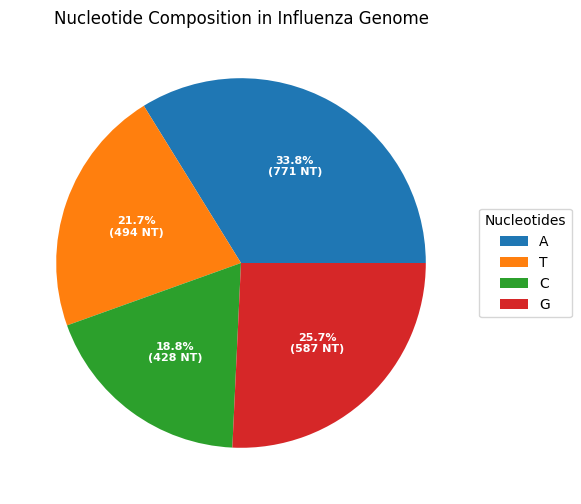

In [15]:
# Data for nucleotides
count_nucleotides = {
    'A': flu_dna.count('A'),
    'T': flu_dna.count('T'),
    'C': flu_dna.count('C'),
    'G': flu_dna.count('G')
}

# Extract data and labels
data = list(count_nucleotides.values())
nucleotides = list(count_nucleotides.keys())

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

def func(pct, allvalus):
    absolute = int(np.round(pct / 100. * np.sum(allvalus)))
    return f"{pct:.1f}%\n({absolute} NT)"

wedges, texts, autotexts = ax.pie(data, labels=nucleotides, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, nucleotides,
          title="Nucleotides",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Nucleotide Composition in Influenza Genome")

plt.show()

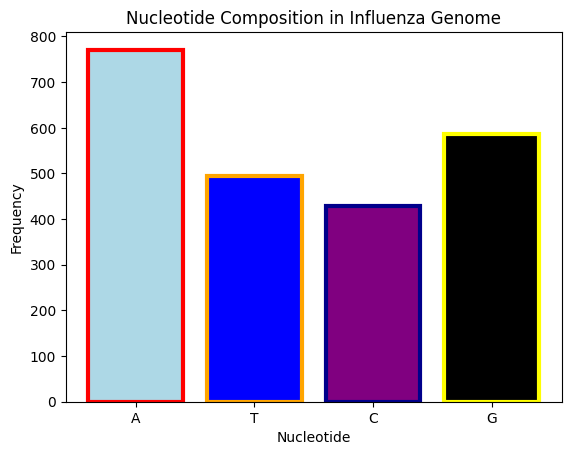

In [16]:
# Bar plot for visualization of Nucleotide Composition
color = ['lightblue', 'blue', 'purple', 'black']
edgecolor = ['red', 'orange', 'darkblue', 'yellow']

# Create bars
fig, ax = plt.subplots()
ax.bar(count_nucleotides.keys(), count_nucleotides.values(),
       color=color,
       edgecolor=edgecolor,
       linewidth=3)
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Composition in Influenza Genome')
# Show graph
plt.show()

In [17]:
# Transcribe flu DNA to RNA
flu_transcribe_dna_to_rna = flu_dna.transcribe()
print(flu_transcribe_dna_to_rna)

AUGGAGAGAAUAAAAGAACUGAGAGAUCUAAUGUCGCAGUCCCGCACUCGCGAGAUAAUCACUAAGACCACUGUGGACCAUAUGGCCAUAAUCAAAAAGUACACAUCAGGAAGGCAAGAGAAGAACCCCGCACUCAGAAUGAAGUGGAUGAUGGCAAUGAGAUACCCAAUUACAGCAGACAAGAGAAUAAUGGACAUGAUUCCGGAGAGGAAUGAACAAGGACAAACCCUCUGGAGCAAAACAAACGAUGCUGGAUCAGACCGAGUGAUGGUAUCACCUCUGGCCGUGACAUGGUGGAACAGAAAUGGCCCAACAACAAGUACAGUUCAUUACCCUAAGGUAUAUAAAACUUAUUUCGAAAAGGUCGAAAGGUUGAAACAUGGUACCUUCGGCCCUGUCCACUUCAGAAAGCAAGUUAAAAUAAGGAGGAGAGUUGAUACAAACCCUGGCCAUGCAGAUCUCAGUGCCAAGGAGGCACAGGAUGUGUUUAUGGAAGUUGUUUUCCCAAAUGAAGUGGGGGCAAGAAUACUGACAUCAGAGUCACAGCUGGCAAUAACAAAAGAGAAGAAAGAAGAGCUCCAGGAUUGUAAAAUUGCUCCAUUGAUGGUGGCGCACAUGCUAGAAAGAGAAUUGGUCCGUAAAACAAGGUUUCUCCCAGUAGCCGGUGGAACAGGCAGUGUUUAUAUUGAAUUGUUGCACUUAACCCAAGGGACGUGCUGGGAGCAGAUGUACACUCCAGGAGGAGAAGUGAGAAAUGAUGAUGUUGACCAAAGUUUGAUUAUCGCUGCUAGAAACAUAGUAAGAAGAGCAGCAGUGUCAGCAGACCCAUUAGCAUCUCUCUUGGAAAUGUGCCACAGCACACAGAUUGGAGGAGUAAGGAUGGUGGACAUCCUUAGACAGAAUCCAACUGAGGAACAAGCCGUAGACAUAUGCAAGGCAGCAAUAGGGUUGAGGAUUAGCUCAUCUUUCAGUUUUGGUGGGUUCACUUUCAAAAGGACAA

In [18]:
# Translate flu RNA to Amino Acid
flu_translate_rna_to_amino_acid = flu_transcribe_dna_to_rna.translate()
print(flu_translate_rna_to_amino_acid)

MERIKELRDLMSQSRTREIITKTTVDHMAIIKKYTSGRQEKNPALRMKWMMAMRYPITADKRIMDMIPERNEQGQTLWSKTNDAGSDRVMVSPLAVTWWNRNGPTTSTVHYPKVYKTYFEKVERLKHGTFGPVHFRKQVKIRRRVDTNPGHADLSAKEAQDVFMEVVFPNEVGARILTSESQLAITKEKKEELQDCKIAPLMVAHMLERELVRKTRFLPVAGGTGSVYIELLHLTQGTCWEQMYTPGGEVRNDDVDQSLIIAARNIVRRAAVSADPLASLLEMCHSTQIGGVRMVDILRQNPTEEQAVDICKAAIGLRISSSFSFGGFTFKRTSGSSVKKEEEVLTGNLQTLKIRVHEGYEEFTMVGRRATAILRKATRRLIQLIVSGRDDQSIAEAIIVAMVFSHEDCMIKAVRGDLNFVNRANQRLNPMHQLLRHFQKDAKVLFQNWGIESIDNVMGMIGILPDMTPSTEMSMRGIRVSKMGVDEYSSTERVVVRIDRFLRVRDQRGNVLWSPEEVSETQGTERLTITCSSSMMWEINGPESVLVNSYQWIIRNWEIVKIQWSQDPTMLYNKMEFEPFQSLVPKATRSRYSGFVRTLFQQMRDVLGTFDTVQIIKLLPFAAAPPEQSRMQFSSLTVNVRGSGLRILVRGNSPVFNYNKATKRLTVLGKDGGALTEDPDEGTSGVESAVLRGFLIFDKEDKRYDLALSINELSNLAKGEKANVLIGQGDVVLVMKRKRDSSILTDSQTATKRIRMAIN*


In [19]:
# count uniq Amino Acid
uniq_amino_acid = Counter(flu_translate_rna_to_amino_acid)
for aa, num in uniq_amino_acid.most_common(): # Loop for print every AA
    if aa != "*":
        print(f"Amino Acid {aa} : {num}")
    else:
        print(f"Stop codon : {num}")

Amino Acid R : 64
Amino Acid V : 62
Amino Acid L : 60
Amino Acid S : 54
Amino Acid E : 51
Amino Acid T : 51
Amino Acid I : 50
Amino Acid G : 47
Amino Acid K : 44
Amino Acid A : 44
Amino Acid D : 38
Amino Acid M : 34
Amino Acid Q : 34
Amino Acid N : 30
Amino Acid P : 27
Amino Acid F : 26
Amino Acid Y : 14
Amino Acid H : 12
Amino Acid W : 11
Amino Acid C : 6
Stop codon : 1


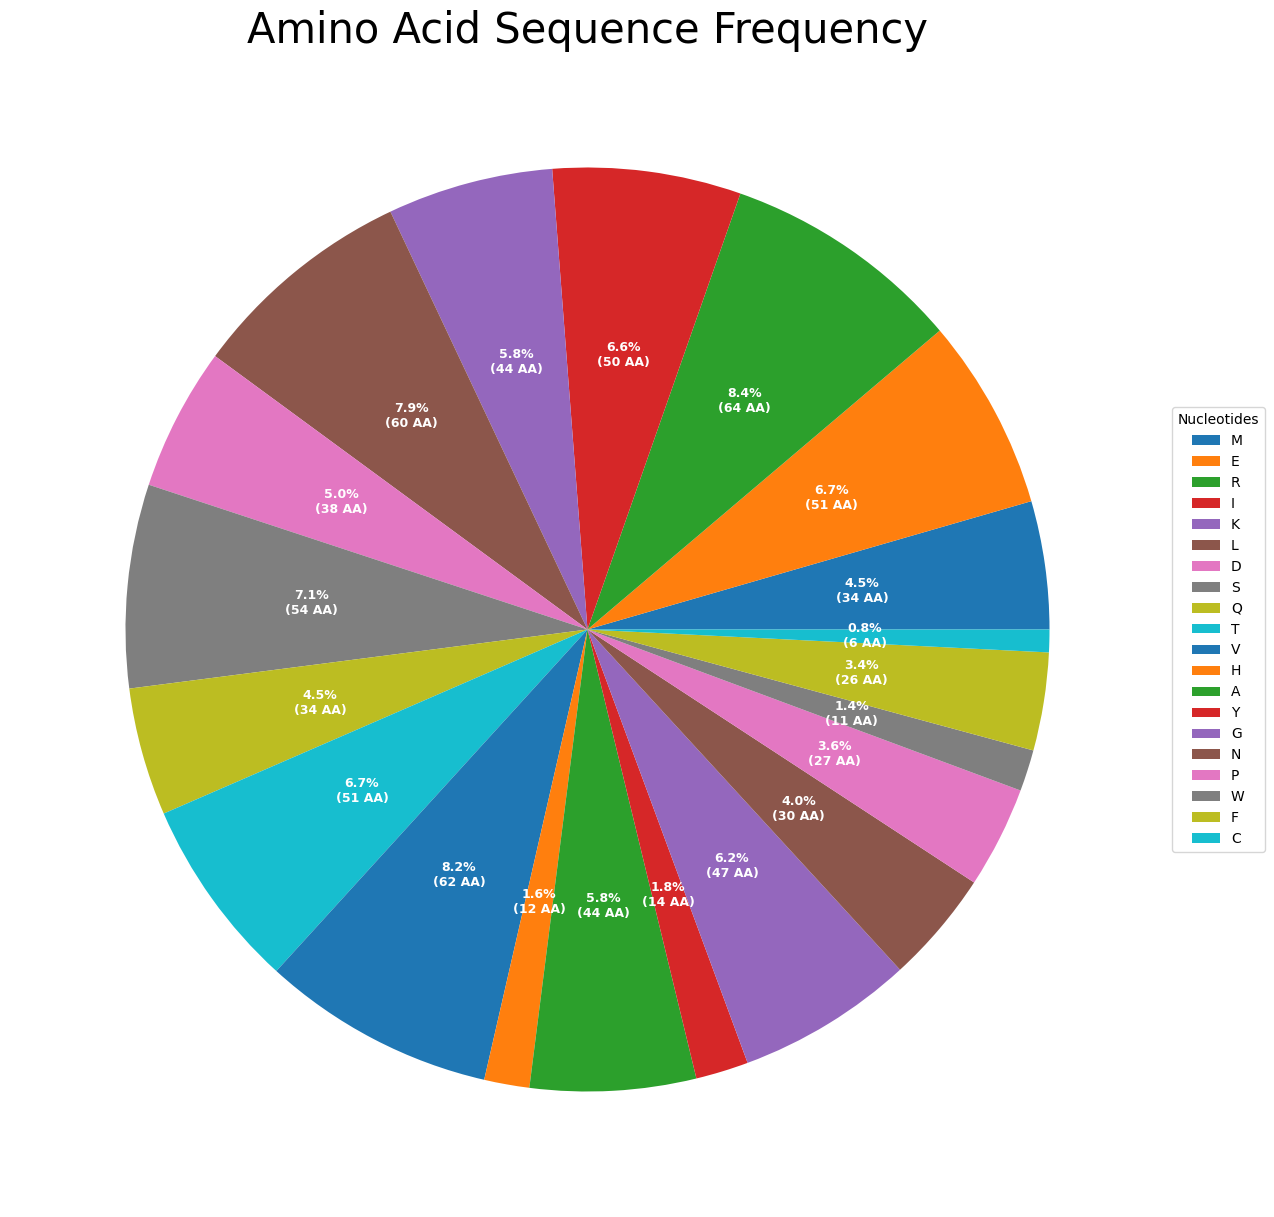

In [20]:
# Remove Unidentified Amino Acid before visualization
del uniq_amino_acid['*']

# Data for Amino Acid


# Extract data and labels
data = list(uniq_amino_acid.values())
nucleotides = list(uniq_amino_acid.keys())

# Create the pie chart
fig, ax = plt.subplots(figsize=(25, 15), subplot_kw=dict(aspect="equal"))

def func(pct, allvalus):
    absolute = int(np.round(pct / 100. * np.sum(allvalus)))
    return f"{pct:.1f}%\n({absolute} AA)"

wedges, texts, autotexts = ax.pie(data, labels=nucleotides, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, nucleotides,
          title="Nucleotides",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=9, weight="bold")

ax.set_title("Amino Acid Sequence Frequency", size=30)

plt.show()

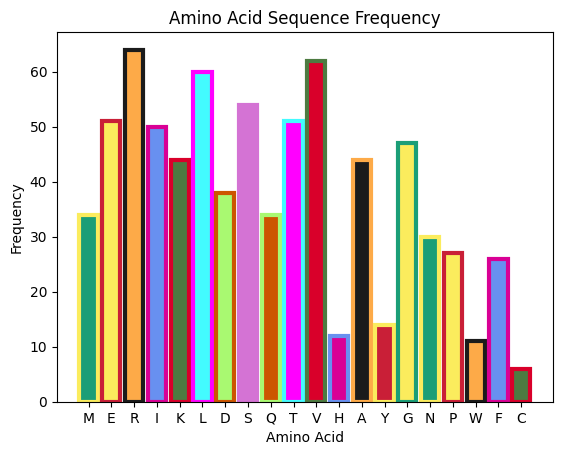

In [21]:
# Bar plot for visualization of Amino Acid
color = ['#1b9e77', '#fbec5d', '#fdaa48','#6890F0','#4d7b41', '#43fbff', '#a9f971', '#d473d4','#cc5500','#ff00ff', '#d9002a', '#d90095', '#1b1b1b','#c91f37','#fbec5d']
edge_color = list()
for colors in color[ : : -1]:
       edge_color.append(colors)

# Create bars
fig, ax = plt.subplots()
ax.bar(uniq_amino_acid.keys(), uniq_amino_acid.values(),
       color=color,
       edgecolor= edge_color,
       linewidth=3)
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Amino Acid Sequence Frequency')
# Show graph
plt.show()

# <p style="background-color:black; font-family:calibri; color:#fffb00; font-size:170%; text-align:center; border-radius:30px 30px;">3-2. Analysis segment 2</p>


In [22]:
try:
    Entrez.email = "seyedmilad.hashemichepi@gmail.com" # You should always tell NCBI who you are.
    handle = Entrez.efetch(db="nucleotide", id="HE589464.1", rettype="gb", retmode="text") # Get info
    recs = list(SeqIO.parse(handle, 'gb'))
except URLError: # handle errors
    print("Please check your internet connection or the URL you are trying to access.")
except InvalidIDError:
     print("Please check the ID you are trying to access.")
except InvalidDatabaseError:
    print("Please check the database you are trying to access.")
except InvalidEmailError:
    print("Please check the email you are trying to access.")
except InvalidTermError:
    print("Please check the term you are trying to access.")
except InvalidRetModeError:
     print("Please check the retmode you are trying to access.")
except InvalidRetTypeError:
    print("Please check the rettype you are trying to access.")
finally: # close the handle
    handle.close()
print(recs[0])

ID: HE589464.1
Name: HE589464
Description: Influenza A virus (A/swine/Pinar del Rio/3/2010(H1N1)) segment 2, complete genome
Database cross-references: BioProject:PRJNA37813
Number of features: 3
/molecule_type=RNA
/topology=linear
/data_file_division=VRL
/date=19-SEP-2011
/accessions=['HE589464']
/sequence_version=1
/keywords=['complete genome', 'complete viral segment']
/source=Influenza A virus (A/swine/Pinar del Rio/3/2010(H1N1))
/organism=Influenza A virus (A/swine/Pinar del Rio/3/2010(H1N1))
/taxonomy=['Viruses', 'Riboviria', 'Orthornavirae', 'Negarnaviricota', 'Polyploviricotina', 'Insthoviricetes', 'Articulavirales', 'Orthomyxoviridae', 'Alphainfluenzavirus', 'Alphainfluenzavirus influenzae']
/references=[Reference(title='Novel H1N1 swine influenza reassortant isolate in pigs derived from the pandemic H1N1/2009 influenza virus in Cuba', ...), Reference(title='Direct Submission', ...)]
Seq('ATGGATGTCAATCCGACTCTACTTTTCCTAAAAGTTCCAGCGCAAAATGCCATA...AAC')


In [23]:
# DNA seq
flu_dna = recs[0].seq
print(flu_dna)

ATGGATGTCAATCCGACTCTACTTTTCCTAAAAGTTCCAGCGCAAAATGCCATAAGCACCACATTCCCTTATACTGGAGATCCTCCATACAGCCATGGAACAGGAACAGGATACACCATGGACACAGTAAACAGAACACACCAATACTCAGAAAAGGGAAAGTGGACGACAAACACAGAGACTGGTGCACCCCAGCTCAACCCGATTGATGGACCACTACCTGAGGATAATGAACCAAGTGGGTATGCACAAACAGACTGTGTTCTAGAGGCTATGGCTTTCCTTGAAGAATCCCACCCAGGAATATTTGAGAATTCATGCCTTGAAACAATGGAAGTTGTTCAACAAACAAGGGTAGATAAACTAACTCAAGGTCGCCAGACTTATGATTGGACATTAAACAGAAATCAACCGGCCGCGACTGCATTGGCCAACACCATAGAAGTCTTTAGATCGAATGGCCTAACAGCTAATGAGTCAGGAAGGCTAATAGATTTCTTAAAGGATGTAATGGAATCAATGAACAAAGAGGAAATAGAGATAACAACCCACTTTCAAAGAAAAAGGAGAGTAAGAGACAACATGACCAAGAAGATGATCACGCAAAGAACAATAGGGAAGAAAAAACAAAGATTGAATAAGAGAGGCTATCTAATAAGAGCACTGACATTAGATACGATGACCAAAGATGCAGAGAGAGGCAAGTTAAAAAGAAGGGCTATCGCAACACCTGGGATGCAGATTAGAGGTTTCGTATACTTTGTTGAAACTTTAGCTAGGAGCATTTGCGAAAAGCTTGAACAGTCTGGGCTCCCAGTAGGGGGCAATGAAAAGAAGGCCAAACTGGCAAATGTTGTGAGAAAGATGATGACTAATTCACAAGACACAGAGATTTCTTTCACAATCACTGGGGACAACACTAAGTGGAATGAAAATCAAAATCCTCGAATGTTCCTGGCGATGATTACATATATCACCAGAGATCAACCCGAGTGGTTCA

In [24]:
# Length of dna
dna_length = len(flu_dna)
print(f"The genome of Influenza for segment 2 consists of {dna_length} nucleotides.")

The genome of Influenza for segment 2 consists of 2379 nucleotides.


In [25]:
# DNA molecular weight 
dna_mw = molecular_weight(flu_dna)
print(f"The molecular weight of genome in Influenza for segment 2 is {dna_mw:.2f} kilodaltons.")

The molecular weight of genome in Influenza for segment 2 is 738537.89 kilodaltons.


In [26]:
# GC_content
gc_con = gc_fraction(flu_dna)
print(f"The GC content of genome in Influenza for segment 2 is %{gc_con * 100:.0f} percent.")

The GC content of genome in Influenza for segment 2 is %42 percent.


In [27]:
# Number and percentage of nucleotides
count_nucleotides = {
    'A': flu_dna.count('A'),
    'T': flu_dna.count('T'),
    'C': flu_dna.count('C'),
    'G': flu_dna.count('G')
}
sum_of_all_nucleotide = sum(count_nucleotides.values()) # sum of all nucleotide
# Print result
print("total number of nucleotide :" ,sum_of_all_nucleotide)
print(f"Nucleotide A : {count_nucleotides['A']} ====> %{(count_nucleotides['A'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide T : {count_nucleotides['T']} ====> %{(count_nucleotides['T'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide C : {count_nucleotides['C']} ====> %{(count_nucleotides['C'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide G : {count_nucleotides['G']} ====> %{(count_nucleotides['G'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide GC : {count_nucleotides['G'] + count_nucleotides['C']} ====> %{((count_nucleotides['G'] + count_nucleotides['C']) / sum_of_all_nucleotide) * 100 :.0f} percent")

total number of nucleotide : 2379
Nucleotide A : 849 ====> %36 percent
Nucleotide T : 524 ====> %22 percent
Nucleotide C : 449 ====> %19 percent
Nucleotide G : 557 ====> %23 percent
Nucleotide GC : 1006 ====> %42 percent


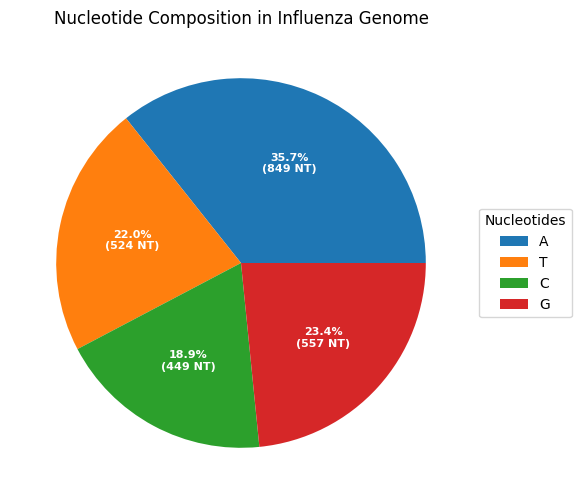

In [28]:
# Data for nucleotides
count_nucleotides = {
    'A': flu_dna.count('A'),
    'T': flu_dna.count('T'),
    'C': flu_dna.count('C'),
    'G': flu_dna.count('G')
}

# Extract data and labels
data = list(count_nucleotides.values())
nucleotides = list(count_nucleotides.keys())

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

def func(pct, allvalus):
    absolute = int(np.round(pct / 100. * np.sum(allvalus)))
    return f"{pct:.1f}%\n({absolute} NT)"

wedges, texts, autotexts = ax.pie(data, labels=nucleotides, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, nucleotides,
          title="Nucleotides",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Nucleotide Composition in Influenza Genome")

plt.show()

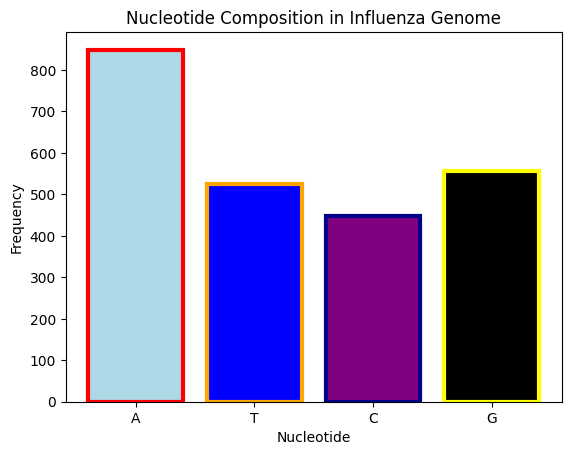

In [29]:
# Bar plot for visualization of Nucleotide Composition
color = ['lightblue', 'blue', 'purple', 'black']
edgecolor = ['red', 'orange', 'darkblue', 'yellow']

# Create bars
fig, ax = plt.subplots()
ax.bar(count_nucleotides.keys(), count_nucleotides.values(),
       color=color,
       edgecolor=edgecolor,
       linewidth=3)
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Composition in Influenza Genome')
# Show graph
plt.show()

In [30]:
# Transcribe flu DNA to RNA
flu_transcribe_dna_to_rna = flu_dna.transcribe()
print(flu_transcribe_dna_to_rna)

AUGGAUGUCAAUCCGACUCUACUUUUCCUAAAAGUUCCAGCGCAAAAUGCCAUAAGCACCACAUUCCCUUAUACUGGAGAUCCUCCAUACAGCCAUGGAACAGGAACAGGAUACACCAUGGACACAGUAAACAGAACACACCAAUACUCAGAAAAGGGAAAGUGGACGACAAACACAGAGACUGGUGCACCCCAGCUCAACCCGAUUGAUGGACCACUACCUGAGGAUAAUGAACCAAGUGGGUAUGCACAAACAGACUGUGUUCUAGAGGCUAUGGCUUUCCUUGAAGAAUCCCACCCAGGAAUAUUUGAGAAUUCAUGCCUUGAAACAAUGGAAGUUGUUCAACAAACAAGGGUAGAUAAACUAACUCAAGGUCGCCAGACUUAUGAUUGGACAUUAAACAGAAAUCAACCGGCCGCGACUGCAUUGGCCAACACCAUAGAAGUCUUUAGAUCGAAUGGCCUAACAGCUAAUGAGUCAGGAAGGCUAAUAGAUUUCUUAAAGGAUGUAAUGGAAUCAAUGAACAAAGAGGAAAUAGAGAUAACAACCCACUUUCAAAGAAAAAGGAGAGUAAGAGACAACAUGACCAAGAAGAUGAUCACGCAAAGAACAAUAGGGAAGAAAAAACAAAGAUUGAAUAAGAGAGGCUAUCUAAUAAGAGCACUGACAUUAGAUACGAUGACCAAAGAUGCAGAGAGAGGCAAGUUAAAAAGAAGGGCUAUCGCAACACCUGGGAUGCAGAUUAGAGGUUUCGUAUACUUUGUUGAAACUUUAGCUAGGAGCAUUUGCGAAAAGCUUGAACAGUCUGGGCUCCCAGUAGGGGGCAAUGAAAAGAAGGCCAAACUGGCAAAUGUUGUGAGAAAGAUGAUGACUAAUUCACAAGACACAGAGAUUUCUUUCACAAUCACUGGGGACAACACUAAGUGGAAUGAAAAUCAAAAUCCUCGAAUGUUCCUGGCGAUGAUUACAUAUAUCACCAGAGAUCAACCCGAGUGGUUCA

In [31]:
# Translate flu RNA to Amino Acid
flu_translate_rna_to_amino_acid = flu_transcribe_dna_to_rna.translate()
print(flu_translate_rna_to_amino_acid)

MDVNPTLLFLKVPAQNAISTTFPYTGDPPYSHGTGTGYTMDTVNRTHQYSEKGKWTTNTETGAPQLNPIDGPLPEDNEPSGYAQTDCVLEAMAFLEESHPGIFENSCLETMEVVQQTRVDKLTQGRQTYDWTLNRNQPAATALANTIEVFRSNGLTANESGRLIDFLKDVMESMNKEEIEITTHFQRKRRVRDNMTKKMITQRTIGKKKQRLNKRGYLIRALTLDTMTKDAERGKLKRRAIATPGMQIRGFVYFVETLARSICEKLEQSGLPVGGNEKKAKLANVVRKMMTNSQDTEISFTITGDNTKWNENQNPRMFLAMITYITRDQPEWFRNILSMAPIMFSNKMARLGKGYMFESKRMKIRTQIPAEMLASIDLKYFNESTKRKIEKIRPLLIDGTASLSPGMMMGMFNMLSTVLGVSILNLGQKKYTKTTYWWDGLQSSDDFALIVNAPNHEGIQAGVDRFYRTCKLVGINMSKKKSYINKTGTFEFTSFFYRYGFVANFSMELPSFGVSGVNESADMSIGVTVIKNNMINNDLGPATAQMALQLFIKDYRYTYRCHRGDTQIQTRRSFELKKLWDQTQSKVGLLVSDGGPNLYNIRNLHIPEVCLKWELMDDDYRGRLCNPLNPFVSHKEIDSVNNAVVMPAHGPAKSMEYDAVATTHSWIPKRNRSILNTSQRGILEDEQMYQKCCNLFEKFFPSSSYRRPVGISSMVEAMVSRARIDARVDFESGRIKKEEFSEIMKICSTIEELRRQK**IENST*NVLLEGSWGGKKKKNGGGREGRGV*KQN


In [32]:
# count uniq Amino Acid
uniq_amino_acid = Counter(flu_translate_rna_to_amino_acid)
for aa, num in uniq_amino_acid.most_common(): # Loop for print every AA
    if aa != "*":
        print(f"Amino Acid {aa} : {num}")
    else:
        print(f"Stop codon : {num}")

Amino Acid T : 61
Amino Acid L : 58
Amino Acid K : 58
Amino Acid G : 55
Amino Acid S : 52
Amino Acid R : 52
Amino Acid N : 51
Amino Acid E : 50
Amino Acid I : 48
Amino Acid A : 40
Amino Acid V : 39
Amino Acid M : 37
Amino Acid D : 36
Amino Acid F : 33
Amino Acid P : 32
Amino Acid Q : 32
Amino Acid Y : 25
Amino Acid H : 10
Amino Acid W : 10
Amino Acid C : 10
Stop codon : 4


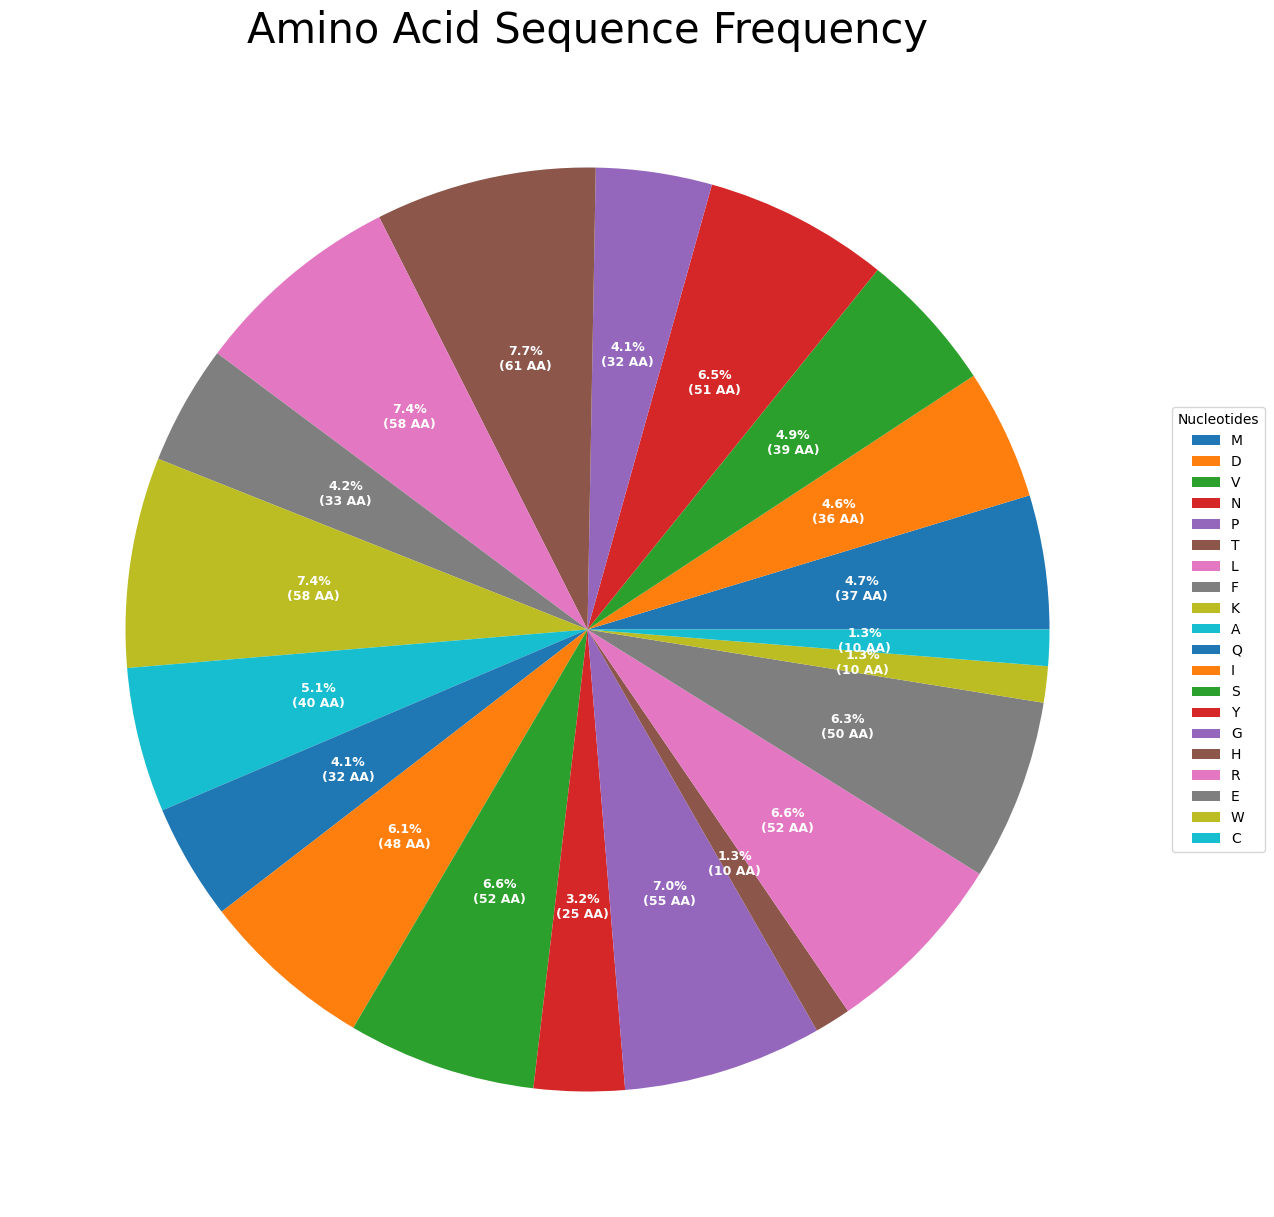

In [33]:
# Remove Unidentified Amino Acid before visualization
del uniq_amino_acid['*']

# Data for Amino Acid


# Extract data and labels
data = list(uniq_amino_acid.values())
nucleotides = list(uniq_amino_acid.keys())

# Create the pie chart
fig, ax = plt.subplots(figsize=(25, 15), subplot_kw=dict(aspect="equal"))

def func(pct, allvalus):
    absolute = int(np.round(pct / 100. * np.sum(allvalus)))
    return f"{pct:.1f}%\n({absolute} AA)"

wedges, texts, autotexts = ax.pie(data, labels=nucleotides, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, nucleotides,
          title="Nucleotides",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=9, weight="bold")

ax.set_title("Amino Acid Sequence Frequency", size=30)

plt.show()

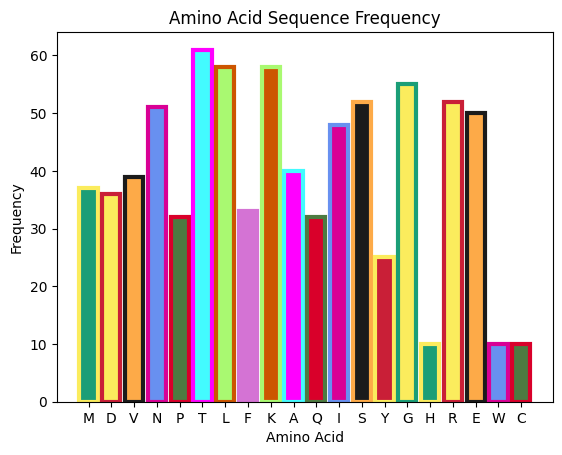

In [34]:
# Bar plot for visualization of Amino Acid
color = ['#1b9e77', '#fbec5d', '#fdaa48','#6890F0','#4d7b41', '#43fbff', '#a9f971', '#d473d4','#cc5500','#ff00ff', '#d9002a', '#d90095', '#1b1b1b','#c91f37','#fbec5d']
edge_color = list()
for colors in color[ : : -1]:
       edge_color.append(colors)

# Create bars
fig, ax = plt.subplots()
ax.bar(uniq_amino_acid.keys(), uniq_amino_acid.values(),
       color=color,
       edgecolor= edge_color,
       linewidth=3)
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Amino Acid Sequence Frequency')
# Show graph
plt.show()

# <p style="background-color:black; font-family:calibri; color:#fffb00; font-size:170%; text-align:center; border-radius:30px 30px;">3-3. Analysis segment 3</p>



In [35]:
try:
    Entrez.email = "seyedmilad.hashemichepi@gmail.com" # You should always tell NCBI who you are.
    handle = Entrez.efetch(db="nucleotide", id="HE589465.1", rettype="gb", retmode="text") # Get info
    recs = list(SeqIO.parse(handle, 'gb'))
except URLError: # handle errors
    print("Please check your internet connection or the URL you are trying to access.")
except InvalidIDError:
     print("Please check the ID you are trying to access.")
except InvalidDatabaseError:
    print("Please check the database you are trying to access.")
except InvalidEmailError:
    print("Please check the email you are trying to access.")
except InvalidTermError:
    print("Please check the term you are trying to access.")
except InvalidRetModeError:
     print("Please check the retmode you are trying to access.")
except InvalidRetTypeError:
    print("Please check the rettype you are trying to access.")
finally: # close the handle
    handle.close()
print(recs[0])

ID: HE589465.1
Name: HE589465
Description: Influenza A virus (A/swine/Pinar del Rio/3/2010(H1N1)) segment 3, complete genome
Database cross-references: BioProject:PRJNA37813
Number of features: 3
/molecule_type=RNA
/topology=linear
/data_file_division=VRL
/date=19-SEP-2011
/accessions=['HE589465']
/sequence_version=1
/keywords=['complete genome', 'complete viral segment']
/source=Influenza A virus (A/swine/Pinar del Rio/3/2010(H1N1))
/organism=Influenza A virus (A/swine/Pinar del Rio/3/2010(H1N1))
/taxonomy=['Viruses', 'Riboviria', 'Orthornavirae', 'Negarnaviricota', 'Polyploviricotina', 'Insthoviricetes', 'Articulavirales', 'Orthomyxoviridae', 'Alphainfluenzavirus', 'Alphainfluenzavirus influenzae']
/references=[Reference(title='Novel H1N1 swine influenza reassortant isolate in pigs derived from the pandemic H1N1/2009 influenza virus in Cuba', ...), Reference(title='Direct Submission', ...)]
Seq('ATGGAGGACTTTGTGCGACAATGCTTCAATCCAATGATCGTCGAGCTTGCGGAA...TGT')


In [36]:
# DNA seq
flu_dna = recs[0].seq
print(flu_dna)

ATGGAGGACTTTGTGCGACAATGCTTCAATCCAATGATCGTCGAGCTTGCGGAAAAGGCAATGAAAGAATATGGGGAAGATCCGAAAATCGAAACTAACAAGTTTGCTGCAATATGCACACATTTGGAAGTTTGTTTCATGTATTCGGATTTCCATTTCATCGACGAACGGGGTGAATCAATAATTGTAGAATCTGGTGACCCGAATGCACTATTGAAGCACCGATTTGAGATAATTGAAGGAAGAGACCGAATCATGGCCTGGACAGTGGTGAACAGTATATGTAACACAACAGGGGTAGAGAAGCCTAAATTTCTTCCTGATTTGTATGATTACAAAGAGAACCGGTTCATTGAAATTGGAGTAACACGGAGGGAAGTCCACATATATTACCTAGAGAAAGCCAACAAAATAAAATCTGAGAAGACACACATTCACATCTTTTCATTCACTGGAGAGGAGATGGCCACCAAAGCGGACTACACCCTTGACGAAGAGAGCAGGGCAAGAATCAAAACTAGGCTTTTCACTATAAGACAAGAAATGGCCAGTAGGAGTCTATGGGATTCCTTTCGTCAGTCCGAAAGAGGCGAAGAGACAATTGAAGAAAAATTTGAGATCACAGGAACTATGCGCAAGCTTGCTGACCAAAGTCTCCCACCGAACTTCTCCAGCCTTGAAAACTTTAGAGCCTATGTAGATGGATTCGAGCCGAACGGCTGCATTGAGGGCAAGCTTTCCCAAATGTCAAAAGAAGTGAACGCCAAAATTGCACCATTCTTGAGGACGACTCCACGCCCCCTCAAATTGCCTGATGGGCCTCTTTGCCATCAGCGGTCAAAGTTCCTGCTGATGGATGCTCTGAAATTAAGTATTGAAGACCCGAGTCACGAGGGGGAGGGAATACCCCTATATGATGCAATCAAATGCATGAAGACATTCTTTGGCTGGAAAGAGCCTAACATAGTCAAACCACATGAGAAAGGCATAAATCCCAATT

In [37]:
# Length of dna
dna_length = len(flu_dna)
print(f"The genome of Influenza for segment 3 consists of {dna_length} nucleotides.")

The genome of Influenza for segment 3 consists of 2202 nucleotides.


In [38]:
# DNA molecular weight 
dna_mw = molecular_weight(flu_dna)
print(f"The molecular weight of genome in Influenza for segment 3 is {dna_mw:.2f} kilodaltons.")

The molecular weight of genome in Influenza for segment 3 is 683188.85 kilodaltons.


In [39]:
# GC_content
gc_con = gc_fraction(flu_dna)
print(f"The GC content of genome in Influenza for segment 3 is %{gc_con * 100:.0f} percent.")

The GC content of genome in Influenza for segment 3 is %44 percent.


In [40]:
# Number and percentage of nucleotides
count_nucleotides = {
    'A': flu_dna.count('A'),
    'T': flu_dna.count('T'),
    'C': flu_dna.count('C'),
    'G': flu_dna.count('G')
}
sum_of_all_nucleotide = sum(count_nucleotides.values()) # sum of all nucleotide
# Print result
print("total number of nucleotide :" ,sum_of_all_nucleotide)
print(f"Nucleotide A : {count_nucleotides['A']} ====> %{(count_nucleotides['A'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide T : {count_nucleotides['T']} ====> %{(count_nucleotides['T'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide C : {count_nucleotides['C']} ====> %{(count_nucleotides['C'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide G : {count_nucleotides['G']} ====> %{(count_nucleotides['G'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide GC : {count_nucleotides['G'] + count_nucleotides['C']} ====> %{((count_nucleotides['G'] + count_nucleotides['C']) / sum_of_all_nucleotide) * 100 :.0f} percent")

total number of nucleotide : 2202
Nucleotide A : 719 ====> %33 percent
Nucleotide T : 516 ====> %23 percent
Nucleotide C : 433 ====> %20 percent
Nucleotide G : 534 ====> %24 percent
Nucleotide GC : 967 ====> %44 percent


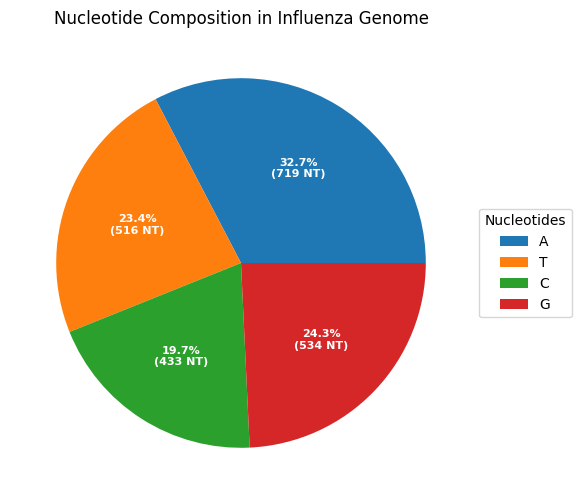

In [41]:
# Data for nucleotides
count_nucleotides = {
    'A': flu_dna.count('A'),
    'T': flu_dna.count('T'),
    'C': flu_dna.count('C'),
    'G': flu_dna.count('G')
}

# Extract data and labels
data = list(count_nucleotides.values())
nucleotides = list(count_nucleotides.keys())

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

def func(pct, allvalus):
    absolute = int(np.round(pct / 100. * np.sum(allvalus)))
    return f"{pct:.1f}%\n({absolute} NT)"

wedges, texts, autotexts = ax.pie(data, labels=nucleotides, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, nucleotides,
          title="Nucleotides",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Nucleotide Composition in Influenza Genome")

plt.show()

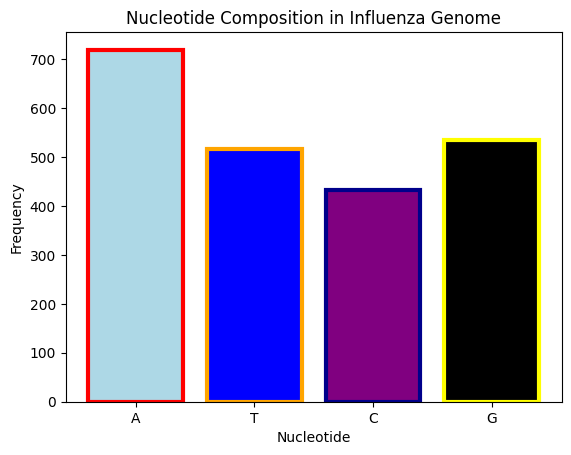

In [42]:
# Bar plot for visualization of Nucleotide Composition
color = ['lightblue', 'blue', 'purple', 'black']
edgecolor = ['red', 'orange', 'darkblue', 'yellow']

# Create bars
fig, ax = plt.subplots()
ax.bar(count_nucleotides.keys(), count_nucleotides.values(),
       color=color,
       edgecolor=edgecolor,
       linewidth=3)
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Composition in Influenza Genome')
# Show graph
plt.show()

In [43]:
# Transcribe flu DNA to RNA
flu_transcribe_dna_to_rna = flu_dna.transcribe()
print(flu_transcribe_dna_to_rna)

AUGGAGGACUUUGUGCGACAAUGCUUCAAUCCAAUGAUCGUCGAGCUUGCGGAAAAGGCAAUGAAAGAAUAUGGGGAAGAUCCGAAAAUCGAAACUAACAAGUUUGCUGCAAUAUGCACACAUUUGGAAGUUUGUUUCAUGUAUUCGGAUUUCCAUUUCAUCGACGAACGGGGUGAAUCAAUAAUUGUAGAAUCUGGUGACCCGAAUGCACUAUUGAAGCACCGAUUUGAGAUAAUUGAAGGAAGAGACCGAAUCAUGGCCUGGACAGUGGUGAACAGUAUAUGUAACACAACAGGGGUAGAGAAGCCUAAAUUUCUUCCUGAUUUGUAUGAUUACAAAGAGAACCGGUUCAUUGAAAUUGGAGUAACACGGAGGGAAGUCCACAUAUAUUACCUAGAGAAAGCCAACAAAAUAAAAUCUGAGAAGACACACAUUCACAUCUUUUCAUUCACUGGAGAGGAGAUGGCCACCAAAGCGGACUACACCCUUGACGAAGAGAGCAGGGCAAGAAUCAAAACUAGGCUUUUCACUAUAAGACAAGAAAUGGCCAGUAGGAGUCUAUGGGAUUCCUUUCGUCAGUCCGAAAGAGGCGAAGAGACAAUUGAAGAAAAAUUUGAGAUCACAGGAACUAUGCGCAAGCUUGCUGACCAAAGUCUCCCACCGAACUUCUCCAGCCUUGAAAACUUUAGAGCCUAUGUAGAUGGAUUCGAGCCGAACGGCUGCAUUGAGGGCAAGCUUUCCCAAAUGUCAAAAGAAGUGAACGCCAAAAUUGCACCAUUCUUGAGGACGACUCCACGCCCCCUCAAAUUGCCUGAUGGGCCUCUUUGCCAUCAGCGGUCAAAGUUCCUGCUGAUGGAUGCUCUGAAAUUAAGUAUUGAAGACCCGAGUCACGAGGGGGAGGGAAUACCCCUAUAUGAUGCAAUCAAAUGCAUGAAGACAUUCUUUGGCUGGAAAGAGCCUAACAUAGUCAAACCACAUGAGAAAGGCAUAAAUCCCAAUU

In [44]:
# Translate flu RNA to Amino Acid
flu_translate_rna_to_amino_acid = flu_transcribe_dna_to_rna.translate()
print(flu_translate_rna_to_amino_acid)

MEDFVRQCFNPMIVELAEKAMKEYGEDPKIETNKFAAICTHLEVCFMYSDFHFIDERGESIIVESGDPNALLKHRFEIIEGRDRIMAWTVVNSICNTTGVEKPKFLPDLYDYKENRFIEIGVTRREVHIYYLEKANKIKSEKTHIHIFSFTGEEMATKADYTLDEESRARIKTRLFTIRQEMASRSLWDSFRQSERGEETIEEKFEITGTMRKLADQSLPPNFSSLENFRAYVDGFEPNGCIEGKLSQMSKEVNAKIAPFLRTTPRPLKLPDGPLCHQRSKFLLMDALKLSIEDPSHEGEGIPLYDAIKCMKTFFGWKEPNIVKPHEKGINPNYLMAWKQVLAELQDIENEEKIPRTKNMKRTSQLKWALGENMAPEKVDFDDCKDVGDLKQYDSDEPEPKSLASWVQNEFNKACELTDSSWIELDEIGEDVAPIEHIASMRRNYFTAEVSHCRATEYIMKGVYINTALLNASCAAMDDFQLIPMISKCRTKEGRRKTNLYGFIIKGRSHLRNDTDVVNFVSMEFSLTDPRLEPHKWEKYCVLEIGDMLLRTAIGQVSRPMFLYVRTNGTSKIKMKWGMEMRRCLLQSLQQIESMIEAESSVKEKDMTKEFFENKSETWPIGESPRGVEEGSIGKVCRTLLAKSVFNSIYASPQLEGFSAESRKLLLIVQALRDNLEPGTFDLGGLYEAIEECLINDPWVLLNASWFNSFLTHALK*LWQCYYLLSILSKKVPC


In [45]:
# count uniq Amino Acid
uniq_amino_acid = Counter(flu_translate_rna_to_amino_acid)
for aa, num in uniq_amino_acid.most_common(): # Loop for print every AA
    if aa != "*":
        print(f"Amino Acid {aa} : {num}")
    else:
        print(f"Stop codon : {num}")

Amino Acid E : 76
Amino Acid L : 65
Amino Acid K : 57
Amino Acid I : 51
Amino Acid S : 50
Amino Acid R : 40
Amino Acid A : 40
Amino Acid D : 38
Amino Acid F : 36
Amino Acid G : 36
Amino Acid T : 36
Amino Acid P : 33
Amino Acid V : 32
Amino Acid N : 32
Amino Acid M : 26
Amino Acid Y : 21
Amino Acid Q : 19
Amino Acid C : 18
Amino Acid H : 14
Amino Acid W : 13
Stop codon : 1


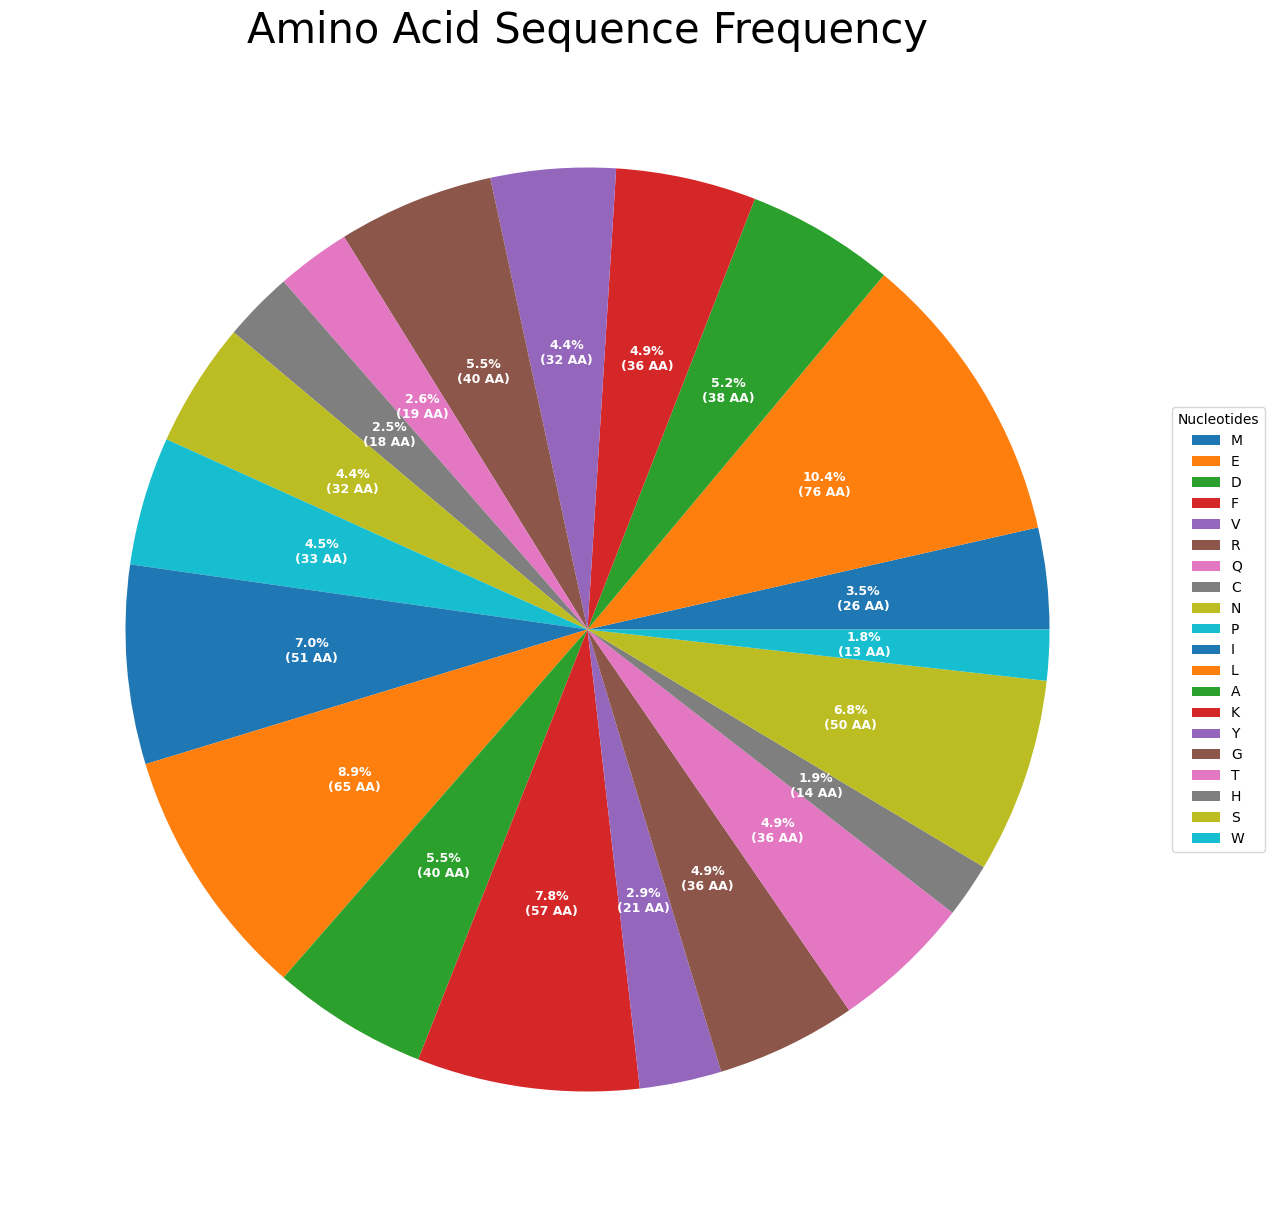

In [46]:
# Remove Unidentified Amino Acid before visualization
del uniq_amino_acid['*']

# Data for Amino Acid


# Extract data and labels
data = list(uniq_amino_acid.values())
nucleotides = list(uniq_amino_acid.keys())

# Create the pie chart
fig, ax = plt.subplots(figsize=(25, 15), subplot_kw=dict(aspect="equal"))

def func(pct, allvalus):
    absolute = int(np.round(pct / 100. * np.sum(allvalus)))
    return f"{pct:.1f}%\n({absolute} AA)"

wedges, texts, autotexts = ax.pie(data, labels=nucleotides, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, nucleotides,
          title="Nucleotides",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=9, weight="bold")

ax.set_title("Amino Acid Sequence Frequency", size=30)

plt.show()

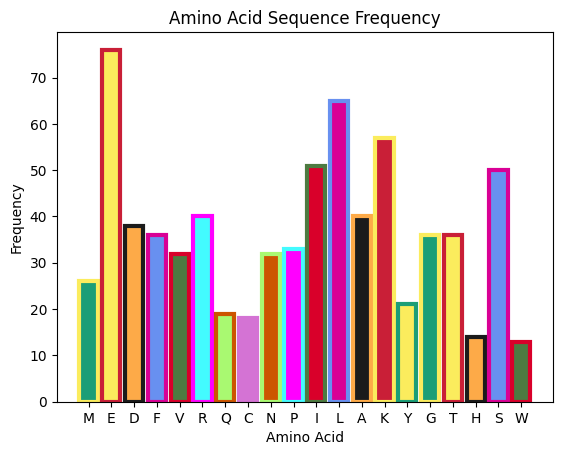

In [47]:
# Bar plot for visualization of Amino Acid
color = ['#1b9e77', '#fbec5d', '#fdaa48','#6890F0','#4d7b41', '#43fbff', '#a9f971', '#d473d4','#cc5500','#ff00ff', '#d9002a', '#d90095', '#1b1b1b','#c91f37','#fbec5d']
edge_color = list()
for colors in color[ : : -1]:
       edge_color.append(colors)

# Create bars
fig, ax = plt.subplots()
ax.bar(uniq_amino_acid.keys(), uniq_amino_acid.values(),
       color=color,
       edgecolor= edge_color,
       linewidth=3)
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Amino Acid Sequence Frequency')
# Show graph
plt.show()

# <p style="background-color:black; font-family:calibri; color:#fffb00; font-size:170%; text-align:center; border-radius:30px 30px;">3-4. Analysis segment 4</p>




In [48]:
try:
    Entrez.email = "seyedmilad.hashemichepi@gmail.com" # You should always tell NCBI who you are.
    handle = Entrez.efetch(db="nucleotide", id="HE589466.1", rettype="gb", retmode="text") # Get info
    recs = list(SeqIO.parse(handle, 'gb'))
except URLError: # handle errors
    print("Please check your internet connection or the URL you are trying to access.")
except InvalidIDError:
     print("Please check the ID you are trying to access.")
except InvalidDatabaseError:
    print("Please check the database you are trying to access.")
except InvalidEmailError:
    print("Please check the email you are trying to access.")
except InvalidTermError:
    print("Please check the term you are trying to access.")
except InvalidRetModeError:
     print("Please check the retmode you are trying to access.")
except InvalidRetTypeError:
    print("Please check the rettype you are trying to access.")
finally: # close the handle
    handle.close()
print(recs[0])

ID: HE589466.1
Name: HE589466
Description: Influenza A virus (A/swine/Pinar del Rio/3/2010(H1N1)) segment 4, complete genome
Database cross-references: BioProject:PRJNA37813
Number of features: 3
/molecule_type=RNA
/topology=linear
/data_file_division=VRL
/date=19-SEP-2011
/accessions=['HE589466']
/sequence_version=1
/keywords=['complete genome', 'complete viral segment']
/source=Influenza A virus (A/swine/Pinar del Rio/3/2010(H1N1))
/organism=Influenza A virus (A/swine/Pinar del Rio/3/2010(H1N1))
/taxonomy=['Viruses', 'Riboviria', 'Orthornavirae', 'Negarnaviricota', 'Polyploviricotina', 'Insthoviricetes', 'Articulavirales', 'Orthomyxoviridae', 'Alphainfluenzavirus', 'Alphainfluenzavirus influenzae']
/references=[Reference(title='Novel H1N1 swine influenza reassortant isolate in pigs derived from the pandemic H1N1/2009 influenza virus in Cuba', ...), Reference(title='Direct Submission', ...)]
Seq('ATGAAGGCAATACTAGTAGTTCTGCTATATACATTTGCAACCGCAAGTGCAGAC...ACA')


In [49]:
# DNA seq
flu_dna = recs[0].seq
print(flu_dna)

ATGAAGGCAATACTAGTAGTTCTGCTATATACATTTGCAACCGCAAGTGCAGACACATTATGTATAGGTTATCATGCGAACAATTCAACAGACACTGTAGACACAGTACTAGAAAAGAATGTAACAGTAACACACTCTGTTAACCTTCTAGAAGACAAGCATAACGGGAAACTATGCAAACTAAGAGAGGTAGCCCCATTACATTTGGGTAAATGTAACATTGCTGGCTGGATCCTGGGAAATCCAGAGTGTGAATCACTCTCCACAGCAAGCTCATGGTCCTACATTGTGGAAACATCTAGTCCAGACAATGGAACGTGTTACCCAGGAGATTTCATCGATTATGAGGAGCTAAGAGAGCAATTGAGCTCAGTGTCATCATTTGAAAGGTTTGAGATATTCCCCAAGACAAGTTCATGGCCCAATCATGACTCGAACAAAGGTGTAACGGCAGCATGTCCTCATGCTGGAGCAAAAAGCTTCTACAAAAATTTAATATGGCTAGTTAAAAAAGGAAATTCATACCCAAAGCTCAGCAAATCCTACATTAATGATAAAGAGAAAGAAGTCCTCGTGCTATGGGGCATTCACCATCCATCTACTAGTGCTGACCAACAAAGTCTCTATCAGAATGCAGATGCATATGTTTTTGTGGGGACATCAAGGTACAGCAAGAAGTTCAAGCCGGAAATAGCAATAAGACCCAAAGTGAGGGGTCAAGAAGGGAGAATGAACTATTACTGGACACTAGTAGAGCCGGGAGACAAAATAACATTCGAAGCAACTGGAAATCTAGTGGTACCGAGATATGCATTCGCAATGGAAAAAAATGCTGGATCTGGTATTATCATTTCAGATACACCAGTCCACGATTGCAATACAACTTGTCAGACACCCAAGGGTGCTATAAACACCAGCCTCCCATTTCAGAATATACATCCGATCACAATTGGAAAATGTCCAAAATATGTAAAAAGCACAAAATTGAGACTGGCCACAG

In [50]:
# Length of dna
dna_length = len(flu_dna)
print(f"The genome of Influenza for segment 4 consists of {dna_length} nucleotides.")

The genome of Influenza for segment 4 consists of 1756 nucleotides.


In [51]:
# DNA molecular weight 
dna_mw = molecular_weight(flu_dna)
print(f"The molecular weight of genome in Influenza for segment 4 is {dna_mw:.2f} kilodaltons.")

The molecular weight of genome in Influenza for segment 4 is 544597.77 kilodaltons.


In [52]:
# GC_content
gc_con = gc_fraction(flu_dna)
print(f"The GC content of genome in Influenza for segment 4 is %{gc_con * 100:.0f} percent.")

The GC content of genome in Influenza for segment 4 is %41 percent.


In [53]:
# Number and percentage of nucleotides
count_nucleotides = {
    'A': flu_dna.count('A'),
    'T': flu_dna.count('T'),
    'C': flu_dna.count('C'),
    'G': flu_dna.count('G')
}
sum_of_all_nucleotide = sum(count_nucleotides.values()) # sum of all nucleotide
# Print result
print("total number of nucleotide :" ,sum_of_all_nucleotide)
print(f"Nucleotide A : {count_nucleotides['A']} ====> %{(count_nucleotides['A'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide T : {count_nucleotides['T']} ====> %{(count_nucleotides['T'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide C : {count_nucleotides['C']} ====> %{(count_nucleotides['C'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide G : {count_nucleotides['G']} ====> %{(count_nucleotides['G'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide GC : {count_nucleotides['G'] + count_nucleotides['C']} ====> %{((count_nucleotides['G'] + count_nucleotides['C']) / sum_of_all_nucleotide) * 100 :.0f} percent")

total number of nucleotide : 1756
Nucleotide A : 623 ====> %35 percent
Nucleotide T : 421 ====> %24 percent
Nucleotide C : 325 ====> %19 percent
Nucleotide G : 387 ====> %22 percent
Nucleotide GC : 712 ====> %41 percent


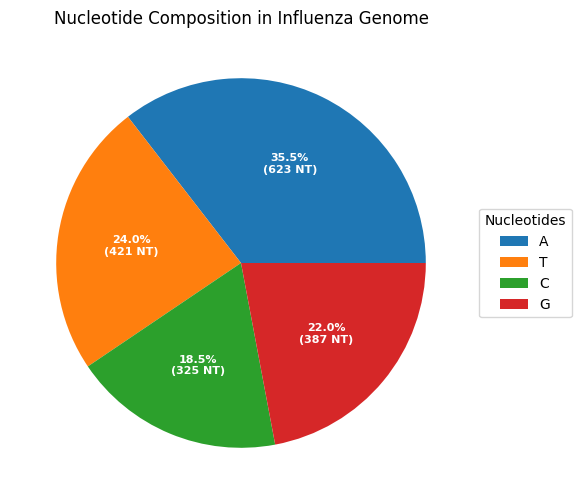

In [54]:
# Data for nucleotides
count_nucleotides = {
    'A': flu_dna.count('A'),
    'T': flu_dna.count('T'),
    'C': flu_dna.count('C'),
    'G': flu_dna.count('G')
}

# Extract data and labels
data = list(count_nucleotides.values())
nucleotides = list(count_nucleotides.keys())

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

def func(pct, allvalus):
    absolute = int(np.round(pct / 100. * np.sum(allvalus)))
    return f"{pct:.1f}%\n({absolute} NT)"

wedges, texts, autotexts = ax.pie(data, labels=nucleotides, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, nucleotides,
          title="Nucleotides",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Nucleotide Composition in Influenza Genome")

plt.show()

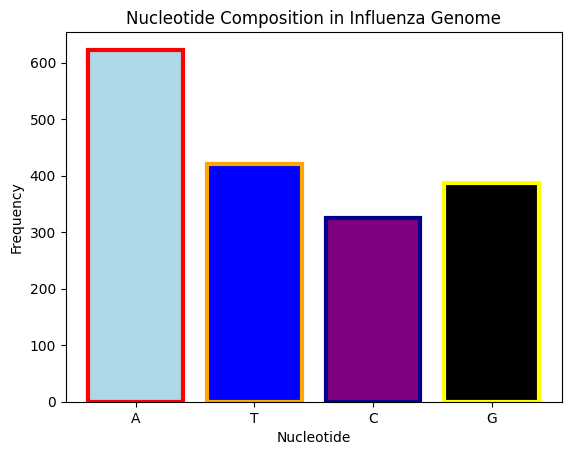

In [55]:
# Bar plot for visualization of Nucleotide Composition
color = ['lightblue', 'blue', 'purple', 'black']
edgecolor = ['red', 'orange', 'darkblue', 'yellow']

# Create bars
fig, ax = plt.subplots()
ax.bar(count_nucleotides.keys(), count_nucleotides.values(),
       color=color,
       edgecolor=edgecolor,
       linewidth=3)
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Composition in Influenza Genome')
# Show graph
plt.show()

In [56]:
# Transcribe flu DNA to RNA
flu_transcribe_dna_to_rna = flu_dna.transcribe()
print(flu_transcribe_dna_to_rna)

AUGAAGGCAAUACUAGUAGUUCUGCUAUAUACAUUUGCAACCGCAAGUGCAGACACAUUAUGUAUAGGUUAUCAUGCGAACAAUUCAACAGACACUGUAGACACAGUACUAGAAAAGAAUGUAACAGUAACACACUCUGUUAACCUUCUAGAAGACAAGCAUAACGGGAAACUAUGCAAACUAAGAGAGGUAGCCCCAUUACAUUUGGGUAAAUGUAACAUUGCUGGCUGGAUCCUGGGAAAUCCAGAGUGUGAAUCACUCUCCACAGCAAGCUCAUGGUCCUACAUUGUGGAAACAUCUAGUCCAGACAAUGGAACGUGUUACCCAGGAGAUUUCAUCGAUUAUGAGGAGCUAAGAGAGCAAUUGAGCUCAGUGUCAUCAUUUGAAAGGUUUGAGAUAUUCCCCAAGACAAGUUCAUGGCCCAAUCAUGACUCGAACAAAGGUGUAACGGCAGCAUGUCCUCAUGCUGGAGCAAAAAGCUUCUACAAAAAUUUAAUAUGGCUAGUUAAAAAAGGAAAUUCAUACCCAAAGCUCAGCAAAUCCUACAUUAAUGAUAAAGAGAAAGAAGUCCUCGUGCUAUGGGGCAUUCACCAUCCAUCUACUAGUGCUGACCAACAAAGUCUCUAUCAGAAUGCAGAUGCAUAUGUUUUUGUGGGGACAUCAAGGUACAGCAAGAAGUUCAAGCCGGAAAUAGCAAUAAGACCCAAAGUGAGGGGUCAAGAAGGGAGAAUGAACUAUUACUGGACACUAGUAGAGCCGGGAGACAAAAUAACAUUCGAAGCAACUGGAAAUCUAGUGGUACCGAGAUAUGCAUUCGCAAUGGAAAAAAAUGCUGGAUCUGGUAUUAUCAUUUCAGAUACACCAGUCCACGAUUGCAAUACAACUUGUCAGACACCCAAGGGUGCUAUAAACACCAGCCUCCCAUUUCAGAAUAUACAUCCGAUCACAAUUGGAAAAUGUCCAAAAUAUGUAAAAAGCACAAAAUUGAGACUGGCCACAG

In [57]:
# Translate flu RNA to Amino Acid
flu_translate_rna_to_amino_acid = flu_transcribe_dna_to_rna.translate()
print(flu_translate_rna_to_amino_acid)

MKAILVVLLYTFATASADTLCIGYHANNSTDTVDTVLEKNVTVTHSVNLLEDKHNGKLCKLREVAPLHLGKCNIAGWILGNPECESLSTASSWSYIVETSSPDNGTCYPGDFIDYEELREQLSSVSSFERFEIFPKTSSWPNHDSNKGVTAACPHAGAKSFYKNLIWLVKKGNSYPKLSKSYINDKEKEVLVLWGIHHPSTSADQQSLYQNADAYVFVGTSRYSKKFKPEIAIRPKVRGQEGRMNYYWTLVEPGDKITFEATGNLVVPRYAFAMEKNAGSGIIISDTPVHDCNTTCQTPKGAINTSLPFQNIHPITIGKCPKYVKSTKLRLATGLRNVPSIQSRGLFGAIAGFIEGGWTGMVDGWYGYHHQNEQGSGYAADLKSTQNAIDEITNKVNSVIEKMNTQFTAVGKEFNHLEKRIENLNKKVDDGFLDIWTYNAELLVLLENERTLDYHDSNVKNLYEKVRSQLKNNAKEIGNGCFEFYHKCDNTCMESVKNGTYDYPKYSEEAKLNREEIDGVKLESTRIYQILAIYSTVASSLVLVVSLGAISFWMCSNGSLQCRICI*D*DFRNMRKTPLFLLIRD


In [58]:
# count uniq Amino Acid
uniq_amino_acid = Counter(flu_translate_rna_to_amino_acid)
for aa, num in uniq_amino_acid.most_common(): # Loop for print every AA
    if aa != "*":
        print(f"Amino Acid {aa} : {num}")
    else:
        print(f"Stop codon : {num}")

Amino Acid L : 49
Amino Acid S : 47
Amino Acid K : 44
Amino Acid N : 41
Amino Acid G : 39
Amino Acid T : 38
Amino Acid I : 37
Amino Acid V : 37
Amino Acid E : 37
Amino Acid A : 34
Amino Acid D : 28
Amino Acid Y : 27
Amino Acid F : 21
Amino Acid P : 21
Amino Acid R : 20
Amino Acid C : 15
Amino Acid H : 15
Amino Acid Q : 15
Amino Acid W : 10
Amino Acid M : 8
Stop codon : 2


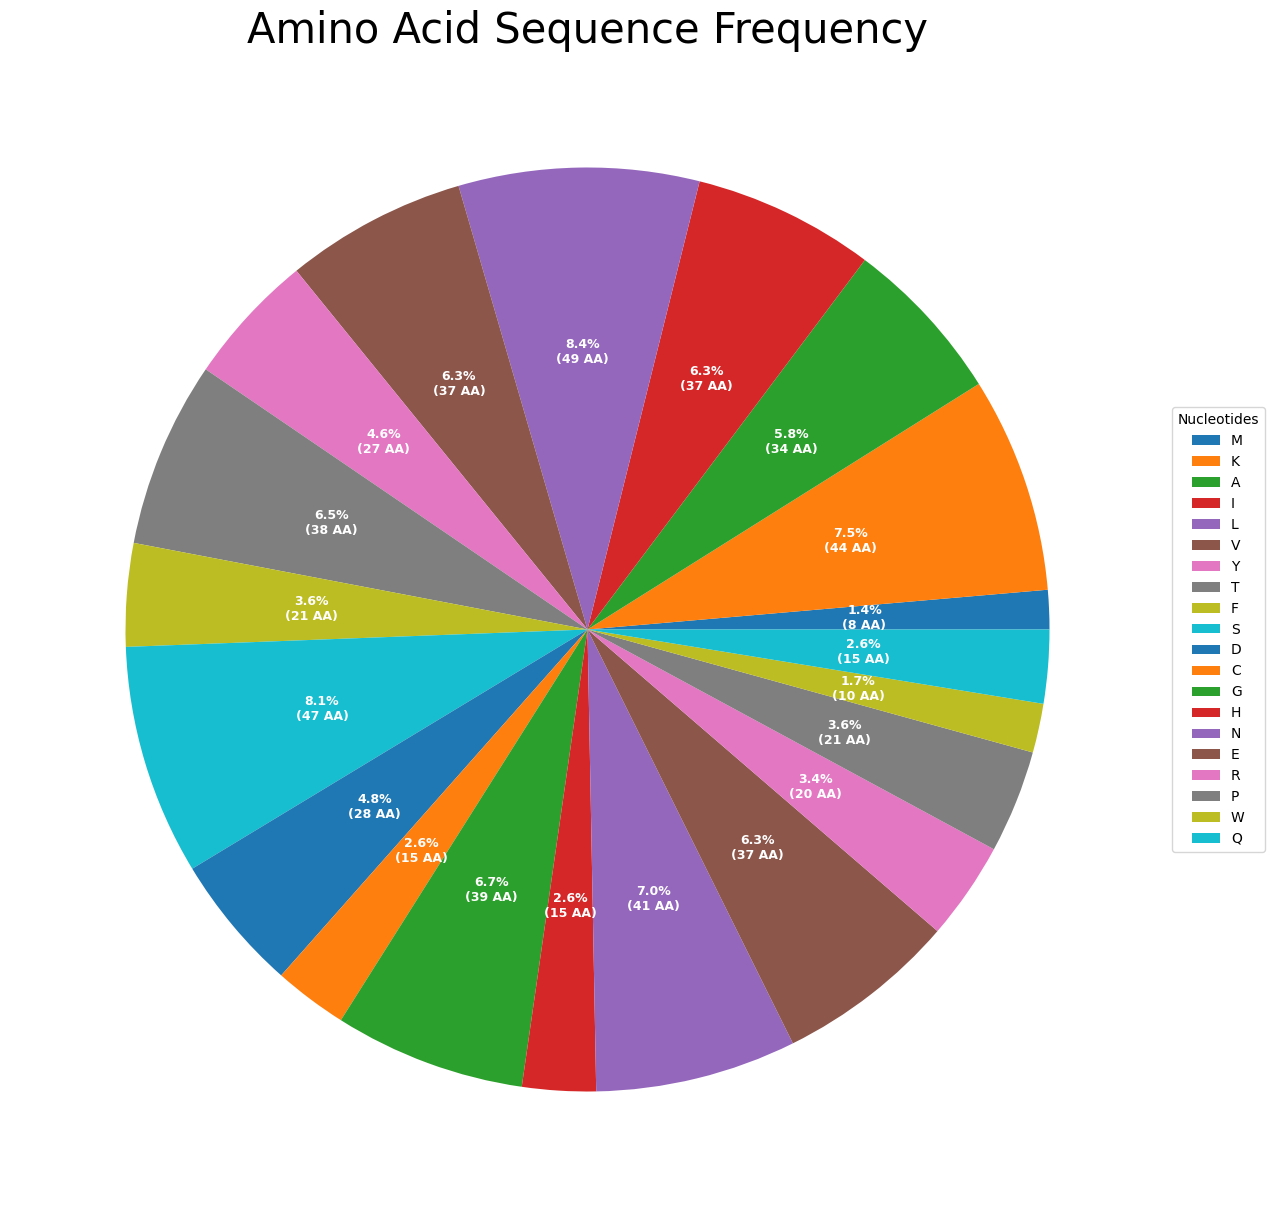

In [59]:
# Remove Unidentified Amino Acid before visualization
del uniq_amino_acid['*']

# Data for Amino Acid


# Extract data and labels
data = list(uniq_amino_acid.values())
nucleotides = list(uniq_amino_acid.keys())

# Create the pie chart
fig, ax = plt.subplots(figsize=(25, 15), subplot_kw=dict(aspect="equal"))

def func(pct, allvalus):
    absolute = int(np.round(pct / 100. * np.sum(allvalus)))
    return f"{pct:.1f}%\n({absolute} AA)"

wedges, texts, autotexts = ax.pie(data, labels=nucleotides, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, nucleotides,
          title="Nucleotides",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=9, weight="bold")

ax.set_title("Amino Acid Sequence Frequency", size=30)

plt.show()

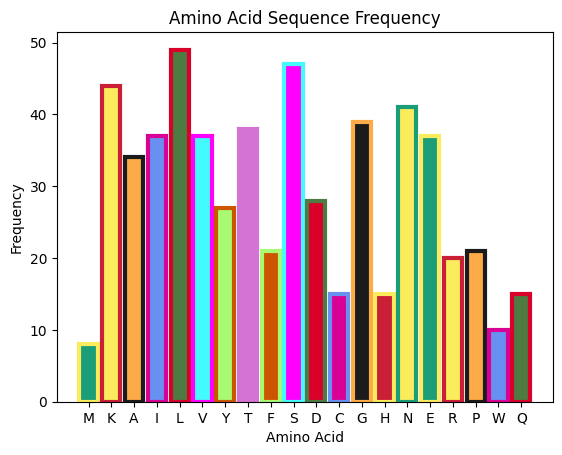

In [60]:
# Bar plot for visualization of Amino Acid
color = ['#1b9e77', '#fbec5d', '#fdaa48','#6890F0','#4d7b41', '#43fbff', '#a9f971', '#d473d4','#cc5500','#ff00ff', '#d9002a', '#d90095', '#1b1b1b','#c91f37','#fbec5d']
edge_color = list()
for colors in color[ : : -1]:
       edge_color.append(colors)

# Create bars
fig, ax = plt.subplots()
ax.bar(uniq_amino_acid.keys(), uniq_amino_acid.values(),
       color=color,
       edgecolor= edge_color,
       linewidth=3)
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Amino Acid Sequence Frequency')
# Show graph
plt.show()

# <p style="background-color:black; font-family:calibri; color:#fffb00; font-size:170%; text-align:center; border-radius:30px 30px;">3-5. Analysis segment 5</p>




In [61]:
try:
    Entrez.email = "seyedmilad.hashemichepi@gmail.com" # You should always tell NCBI who you are.
    handle = Entrez.efetch(db="nucleotide", id="HE584749.1", rettype="gb", retmode="text") # Get info
    recs = list(SeqIO.parse(handle, 'gb'))
except URLError: # handle errors
    print("Please check your internet connection or the URL you are trying to access.")
except InvalidIDError:
     print("Please check the ID you are trying to access.")
except InvalidDatabaseError:
    print("Please check the database you are trying to access.")
except InvalidEmailError:
    print("Please check the email you are trying to access.")
except InvalidTermError:
    print("Please check the term you are trying to access.")
except InvalidRetModeError:
     print("Please check the retmode you are trying to access.")
except InvalidRetTypeError:
    print("Please check the rettype you are trying to access.")
finally: # close the handle
    handle.close()
print(recs[0])

ID: HE584749.1
Name: HE584749
Description: Influenza A virus (A/swine/Holguin/121/2010(H1N1)) segment 5, complete genome
Database cross-references: BioProject:PRJNA37813
Number of features: 3
/molecule_type=RNA
/topology=linear
/data_file_division=VRL
/date=16-SEP-2011
/accessions=['HE584749']
/sequence_version=1
/keywords=['complete genome', 'complete viral segment']
/source=Influenza A virus (A/swine/Holguin/121/2010(H1N1))
/organism=Influenza A virus (A/swine/Holguin/121/2010(H1N1))
/taxonomy=['Viruses', 'Riboviria', 'Orthornavirae', 'Negarnaviricota', 'Polyploviricotina', 'Insthoviricetes', 'Articulavirales', 'Orthomyxoviridae', 'Alphainfluenzavirus', 'Alphainfluenzavirus influenzae']
/references=[Reference(title='Isolation and complete genomic characterization of pandemic H1N1/2009 influenza viruses from Cuban swine herds', ...), Reference(title='Direct Submission', ...)]
Seq('ATGGCGTCTCATGGCACCAAACGATCATATGAACAAATGGAGACTGGTGGGGAG...TGA')


In [62]:
# DNA seq
flu_dna = recs[0].seq
print(flu_dna)

ATGGCGTCTCATGGCACCAAACGATCATATGAACAAATGGAGACTGGTGGGGAGCGCCAGGATGCCACAGAAATCAGAGCATCTGTCGGAAGAATGATTGATGGAATCGGGAGATTCTACATCCAAATGTGCACTGAACTCAAACTCAGTGATTATGATGGACGACTAATCCAGAATAGCATAACAATAGAGAGGATGGTTCTCTCTGCTTTTGATGAGAGAACAAATAAATACCTAGAAGAGCATCCCAGTGCTGGGAAGGACCCTAAGAAAACGGGAGGACCCATATATGGAAGAATAGACGGAAAGTGGATGAGAGAACTCATCCTTTATGACAAAGAAGAAATAAGGAGAGTTTGGCGCCAAGCAAACAATGGCGACGATGCAACAGCAGGTCTTACTCATATCATGATTTGGCATTCCAACCTGAATGATGCCACATATCAGAGAACAAGAGCGCTTGTTCGCACCGGAATGGATCCCAGAATGTGCTCCCTAATGCAAGGTTCAACACTTCCCAGAAGGTCTGGTGCCGCAGGTGCTGCGGTGAAAGGAGTTGGAACAATAGCAATGGAGCTAATCAGAATGATCAAACGTGGAATCAATGACCGAAATTTCTGGAGGGGTGAAAATGGACGAAGGACAAGGGTTGCTTATGAAAGAATGTGCAATATCCTCAAAGGAAAATTTCAAACAGCTGCCCAGAGGGCAATGATGGATCAAGTAAGAGAAAGTCGAAACCCAGGAAACGCTGAGATTGAAGACCTCATTTTCCTGGCACGGTCAGCACTCATTTTGAGGGGATCAGTTGCACATAAATCCTGCCTGCCTGCTTGTGTGTATGGGCTTGCAGTAGCAAGTGGGCATGACTTTGAAAGGGAAGGGTACTCACTGGTCGGGATAGACCCATTTAAATTACTCCAAAACAGCCAAGTGATCAGCCTGATGAGACCAAATGAAAACCCCGCTCACAAGAGTCAATTGGTGTGGATGGCATGTC

In [63]:
# Length of dna
dna_length = len(flu_dna)
print(f"The genome of Influenza for segment 5 consists of {dna_length} nucleotides.")

The genome of Influenza for segment 5 consists of 1497 nucleotides.


In [64]:
# DNA molecular weight 
dna_mw = molecular_weight(flu_dna)
print(f"The molecular weight of genome in Influenza for segment 5 is {dna_mw:.2f} kilodaltons.")

The molecular weight of genome in Influenza for segment 5 is 465194.40 kilodaltons.


In [65]:
# GC_content
gc_con = gc_fraction(flu_dna)
print(f"The GC content of genome in Influenza for segment 5 is %{gc_con * 100:.0f} percent.")

The GC content of genome in Influenza for segment 5 is %46 percent.


In [66]:
# Number and percentage of nucleotides
count_nucleotides = {
    'A': flu_dna.count('A'),
    'T': flu_dna.count('T'),
    'C': flu_dna.count('C'),
    'G': flu_dna.count('G')
}
sum_of_all_nucleotide = sum(count_nucleotides.values()) # sum of all nucleotide
# Print result
print("total number of nucleotide :" ,sum_of_all_nucleotide)
print(f"Nucleotide A : {count_nucleotides['A']} ====> %{(count_nucleotides['A'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide T : {count_nucleotides['T']} ====> %{(count_nucleotides['T'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide C : {count_nucleotides['C']} ====> %{(count_nucleotides['C'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide G : {count_nucleotides['G']} ====> %{(count_nucleotides['G'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide GC : {count_nucleotides['G'] + count_nucleotides['C']} ====> %{((count_nucleotides['G'] + count_nucleotides['C']) / sum_of_all_nucleotide) * 100 :.0f} percent")

total number of nucleotide : 1497
Nucleotide A : 494 ====> %33 percent
Nucleotide T : 314 ====> %21 percent
Nucleotide C : 297 ====> %20 percent
Nucleotide G : 392 ====> %26 percent
Nucleotide GC : 689 ====> %46 percent


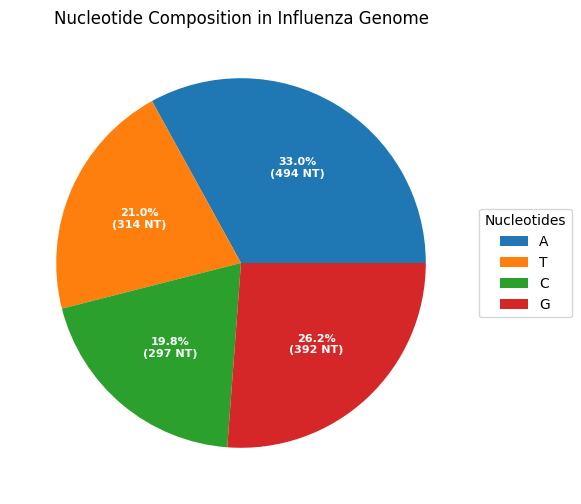

In [67]:
# Data for nucleotides
count_nucleotides = {
    'A': flu_dna.count('A'),
    'T': flu_dna.count('T'),
    'C': flu_dna.count('C'),
    'G': flu_dna.count('G')
}

# Extract data and labels
data = list(count_nucleotides.values())
nucleotides = list(count_nucleotides.keys())

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

def func(pct, allvalus):
    absolute = int(np.round(pct / 100. * np.sum(allvalus)))
    return f"{pct:.1f}%\n({absolute} NT)"

wedges, texts, autotexts = ax.pie(data, labels=nucleotides, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, nucleotides,
          title="Nucleotides",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Nucleotide Composition in Influenza Genome")

plt.show()

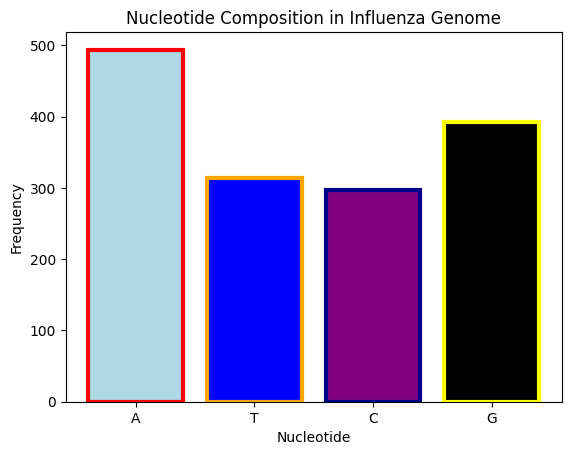

In [68]:
# Bar plot for visualization of Nucleotide Composition
color = ['lightblue', 'blue', 'purple', 'black']
edgecolor = ['red', 'orange', 'darkblue', 'yellow']

# Create bars
fig, ax = plt.subplots()
ax.bar(count_nucleotides.keys(), count_nucleotides.values(),
       color=color,
       edgecolor=edgecolor,
       linewidth=3)
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Composition in Influenza Genome')
# Show graph
plt.show()

In [69]:
# Transcribe flu DNA to RNA
flu_transcribe_dna_to_rna = flu_dna.transcribe()
print(flu_transcribe_dna_to_rna)

AUGGCGUCUCAUGGCACCAAACGAUCAUAUGAACAAAUGGAGACUGGUGGGGAGCGCCAGGAUGCCACAGAAAUCAGAGCAUCUGUCGGAAGAAUGAUUGAUGGAAUCGGGAGAUUCUACAUCCAAAUGUGCACUGAACUCAAACUCAGUGAUUAUGAUGGACGACUAAUCCAGAAUAGCAUAACAAUAGAGAGGAUGGUUCUCUCUGCUUUUGAUGAGAGAACAAAUAAAUACCUAGAAGAGCAUCCCAGUGCUGGGAAGGACCCUAAGAAAACGGGAGGACCCAUAUAUGGAAGAAUAGACGGAAAGUGGAUGAGAGAACUCAUCCUUUAUGACAAAGAAGAAAUAAGGAGAGUUUGGCGCCAAGCAAACAAUGGCGACGAUGCAACAGCAGGUCUUACUCAUAUCAUGAUUUGGCAUUCCAACCUGAAUGAUGCCACAUAUCAGAGAACAAGAGCGCUUGUUCGCACCGGAAUGGAUCCCAGAAUGUGCUCCCUAAUGCAAGGUUCAACACUUCCCAGAAGGUCUGGUGCCGCAGGUGCUGCGGUGAAAGGAGUUGGAACAAUAGCAAUGGAGCUAAUCAGAAUGAUCAAACGUGGAAUCAAUGACCGAAAUUUCUGGAGGGGUGAAAAUGGACGAAGGACAAGGGUUGCUUAUGAAAGAAUGUGCAAUAUCCUCAAAGGAAAAUUUCAAACAGCUGCCCAGAGGGCAAUGAUGGAUCAAGUAAGAGAAAGUCGAAACCCAGGAAACGCUGAGAUUGAAGACCUCAUUUUCCUGGCACGGUCAGCACUCAUUUUGAGGGGAUCAGUUGCACAUAAAUCCUGCCUGCCUGCUUGUGUGUAUGGGCUUGCAGUAGCAAGUGGGCAUGACUUUGAAAGGGAAGGGUACUCACUGGUCGGGAUAGACCCAUUUAAAUUACUCCAAAACAGCCAAGUGAUCAGCCUGAUGAGACCAAAUGAAAACCCCGCUCACAAGAGUCAAUUGGUGUGGAUGGCAUGUC

In [70]:
# Translate flu RNA to Amino Acid
flu_translate_rna_to_amino_acid = flu_transcribe_dna_to_rna.translate()
print(flu_translate_rna_to_amino_acid)

MASHGTKRSYEQMETGGERQDATEIRASVGRMIDGIGRFYIQMCTELKLSDYDGRLIQNSITIERMVLSAFDERTNKYLEEHPSAGKDPKKTGGPIYGRIDGKWMRELILYDKEEIRRVWRQANNGDDATAGLTHIMIWHSNLNDATYQRTRALVRTGMDPRMCSLMQGSTLPRRSGAAGAAVKGVGTIAMELIRMIKRGINDRNFWRGENGRRTRVAYERMCNILKGKFQTAAQRAMMDQVRESRNPGNAEIEDLIFLARSALILRGSVAHKSCLPACVYGLAVASGHDFEREGYSLVGIDPFKLLQNSQVISLMRPNENPAHKSQLVWMACHSAAFEDLRVSSFIRGKKVIPRGKLSTRGVQIASNENVETMNSNTLELRSRYWAIRTRSGGNTNQQKASAGQISVQPTFSVQRNLPFERATVMAAFSGNNEGRTSDMRTEVIRMMENAKPEDLSFQGRGVFELSDEKATNPIVPSFDMSNEGSYFFGDNAEEYDS*


In [71]:
# count uniq Amino Acid
uniq_amino_acid = Counter(flu_translate_rna_to_amino_acid)
for aa, num in uniq_amino_acid.most_common(): # Loop for print every AA
    if aa != "*":
        print(f"Amino Acid {aa} : {num}")
    else:
        print(f"Stop codon : {num}")

Amino Acid R : 48
Amino Acid G : 42
Amino Acid A : 40
Amino Acid S : 39
Amino Acid E : 35
Amino Acid L : 32
Amino Acid I : 30
Amino Acid N : 28
Amino Acid T : 26
Amino Acid D : 24
Amino Acid V : 24
Amino Acid M : 23
Amino Acid K : 21
Amino Acid Q : 20
Amino Acid F : 17
Amino Acid P : 16
Amino Acid Y : 13
Amino Acid H : 8
Amino Acid C : 6
Amino Acid W : 6
Stop codon : 1


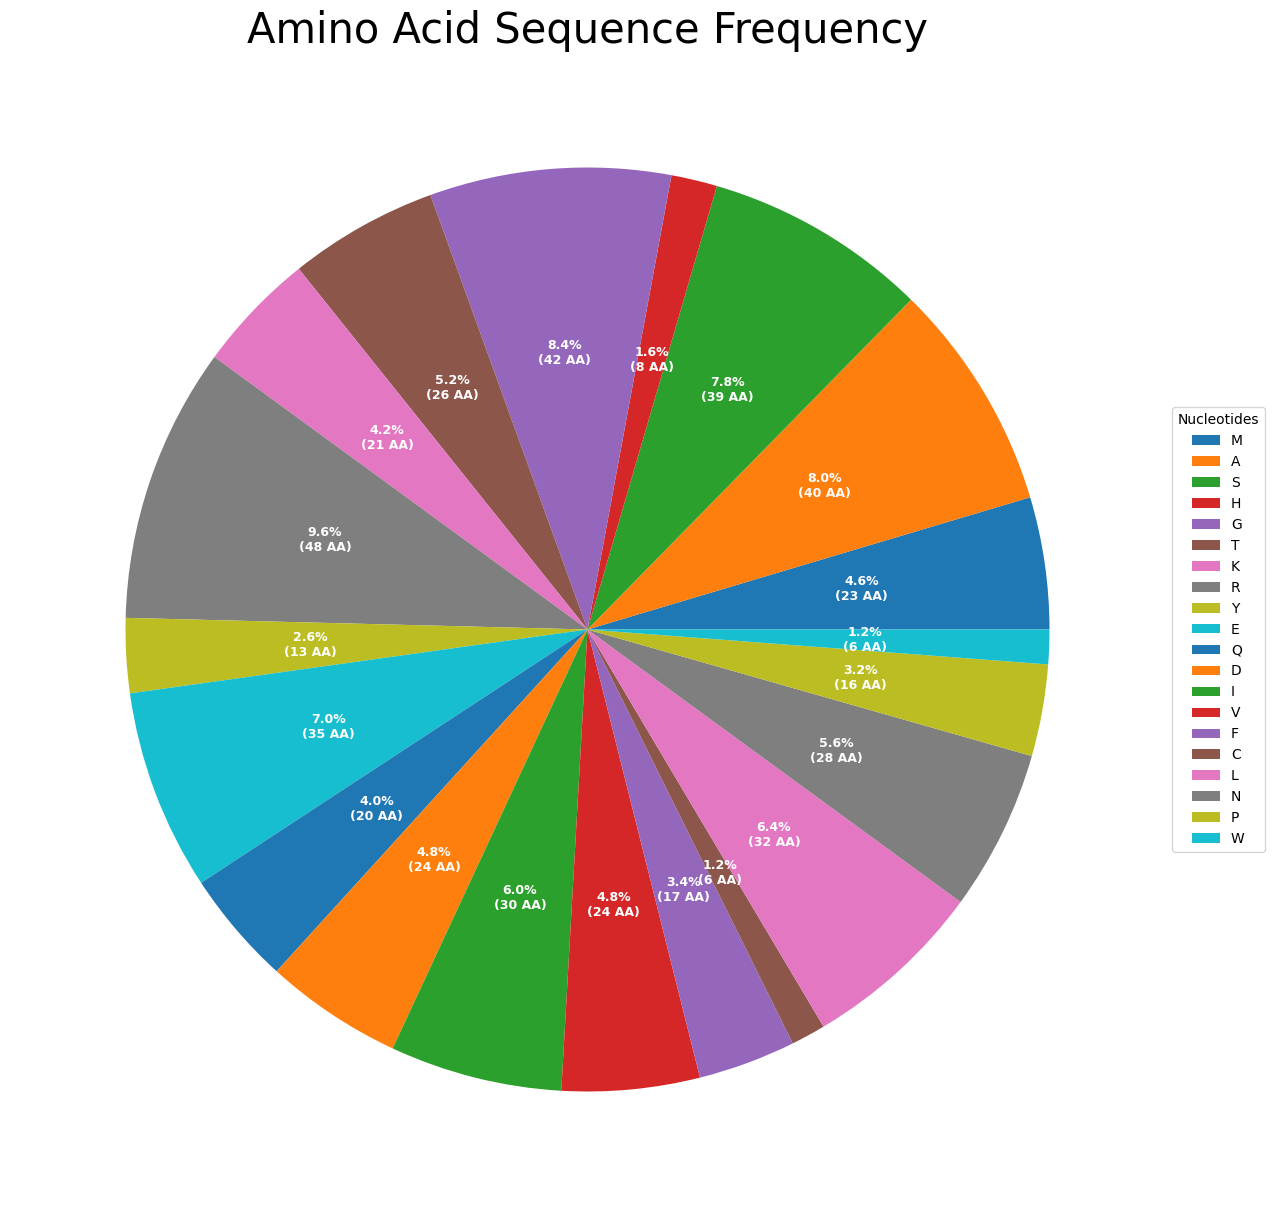

In [72]:
# Remove Unidentified Amino Acid before visualization
del uniq_amino_acid['*']

# Data for Amino Acid


# Extract data and labels
data = list(uniq_amino_acid.values())
nucleotides = list(uniq_amino_acid.keys())

# Create the pie chart
fig, ax = plt.subplots(figsize=(25, 15), subplot_kw=dict(aspect="equal"))

def func(pct, allvalus):
    absolute = int(np.round(pct / 100. * np.sum(allvalus)))
    return f"{pct:.1f}%\n({absolute} AA)"

wedges, texts, autotexts = ax.pie(data, labels=nucleotides, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, nucleotides,
          title="Nucleotides",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=9, weight="bold")

ax.set_title("Amino Acid Sequence Frequency", size=30)

plt.show()

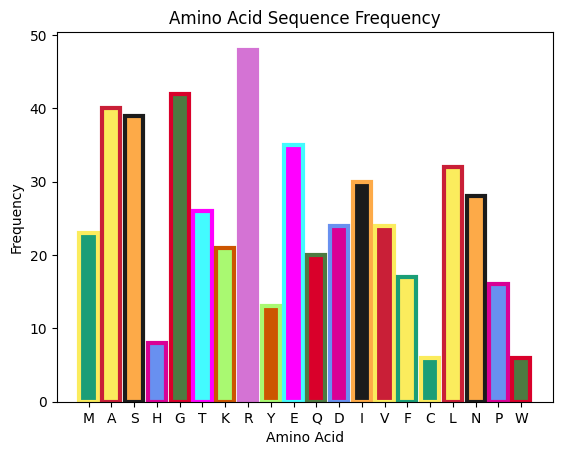

In [73]:
# Bar plot for visualization of Amino Acid
color = ['#1b9e77', '#fbec5d', '#fdaa48','#6890F0','#4d7b41', '#43fbff', '#a9f971', '#d473d4','#cc5500','#ff00ff', '#d9002a', '#d90095', '#1b1b1b','#c91f37','#fbec5d']
edge_color = list()
for colors in color[ : : -1]:
       edge_color.append(colors)

# Create bars
fig, ax = plt.subplots()
ax.bar(uniq_amino_acid.keys(), uniq_amino_acid.values(),
       color=color,
       edgecolor= edge_color,
       linewidth=3)
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Amino Acid Sequence Frequency')
# Show graph
plt.show()

# <p style="background-color:black; font-family:calibri; color:#fffb00; font-size:170%; text-align:center; border-radius:30px 30px;">3-6. Analysis segment 6</p>



In [74]:
try:
    Entrez.email = "seyedmilad.hashemichepi@gmail.com" # You should always tell NCBI who you are.
    handle = Entrez.efetch(db="nucleotide", id="HE589468.1", rettype="gb", retmode="text") # Get info
    recs = list(SeqIO.parse(handle, 'gb'))
except URLError: # handle errors
    print("Please check your internet connection or the URL you are trying to access.")
except InvalidIDError:
     print("Please check the ID you are trying to access.")
except InvalidDatabaseError:
    print("Please check the database you are trying to access.")
except InvalidEmailError:
    print("Please check the email you are trying to access.")
except InvalidTermError:
    print("Please check the term you are trying to access.")
except InvalidRetModeError:
     print("Please check the retmode you are trying to access.")
except InvalidRetTypeError:
    print("Please check the rettype you are trying to access.")
finally: # close the handle
    handle.close()
print(recs[0])

ID: HE589468.1
Name: HE589468
Description: Influenza A virus (A/swine/Pinar del Rio/3/2010(H1N1)) segment 6, complete genome
Database cross-references: BioProject:PRJNA37813
Number of features: 3
/molecule_type=RNA
/topology=linear
/data_file_division=VRL
/date=19-SEP-2011
/accessions=['HE589468']
/sequence_version=1
/keywords=['complete genome', 'complete viral segment']
/source=Influenza A virus (A/swine/Pinar del Rio/3/2010(H1N1))
/organism=Influenza A virus (A/swine/Pinar del Rio/3/2010(H1N1))
/taxonomy=['Viruses', 'Riboviria', 'Orthornavirae', 'Negarnaviricota', 'Polyploviricotina', 'Insthoviricetes', 'Articulavirales', 'Orthomyxoviridae', 'Alphainfluenzavirus', 'Alphainfluenzavirus influenzae']
/references=[Reference(title='Novel H1N1 swine influenza reassortant isolate in pigs derived from the pandemic H1N1/2009 influenza virus in Cuba', ...), Reference(title='Direct Submission', ...)]
Seq('ATGAATCCAAACCAAAAGATAATAACCATTGGTTCAATCTGTATGACAATTGGA...TAA')


In [75]:
# DNA seq
flu_dna = recs[0].seq
print(flu_dna)

ATGAATCCAAACCAAAAGATAATAACCATTGGTTCAATCTGTATGACAATTGGAATGGCTAACTTCATATTACAAATTGGAAACATAATCTCAATATGGATTAGCCACTCAATTCAACTTGGGAATCAAAATCAGATTGAAACATGCAATCAAAGCGTCATTACTTATGAAAACAACACTTGGGTAAATCAGACATATGTTAACATCAGCAACACCAACTTTACTGCTGGAAAGTCAGTGGCTTCCGCGAGAATAGTGGGCAATTCCTCTCTCTGCCCCATCAGTGGGTGGGCTATATACAGTAAAGACAACGGCATAAGAATTGGTTCCAAAGGAGATGTGTTTGTCATAAGGGAACCATTCATTTCATGCTCCCCCTTGGAATGCAGAACCTTTTTCTTGACTCAAGGAGCTTTGCTAAATGACAAGCATTCCAATGGAACCGTTAAAGACAGAAGCCCATATCGAACCCTAATGAGCTGTCCTATTGGTGAAGTTCCCTCTCCATACAACTCAAGATTTGAGTCAGTCGCTTGGTCAGCAAGTGCTTGTCATGATGGCATTAATTGGCTAACAATTGGAATTTCTGGCCCAGACAATGGGGCAGTGGCTGTGTTAAAGTACAACGGCATAATAACAGACACTATCAAGAGTTGGAGAAACAATATATTGAGAACACAAGAGTCTGAATGTGCATGTGTAAATGGTTCTTGCTTTACTGTAATGACCGATGGACCAAGTAATGGACAGGCCTCATACAAGATCTTCAGAATAGAAAAGGGAAAGATAGTCAAATCAGTCGAAATGAATGCCCCTAATTATCACTATGAGGAATGCTCCTGCTATCCTGATTCTAGTGAAATCACATGTGTGTGCAGGGATAACTGGCATGGCTCGAATCGACCGTGGGTGTCTTTCAACCAGAATCTGGAATATCAGATAGGATACATATGCAGTGGGATTTTTGGAGACAATCCACGCCCTATTGATAAGACAGGCA

In [76]:
# Length of dna
dna_length = len(flu_dna)
print(f"The genome of Influenza for segment 6 consists of {dna_length} nucleotides.")

The genome of Influenza for segment 6 consists of 1410 nucleotides.


In [77]:
# DNA molecular weight 
dna_mw = molecular_weight(flu_dna)
print(f"The molecular weight of genome in Influenza for segment 6 is {dna_mw:.2f} kilodaltons.")

The molecular weight of genome in Influenza for segment 6 is 437210.58 kilodaltons.


In [78]:
# GC_content
gc_con = gc_fraction(flu_dna)
print(f"The GC content of genome in Influenza for segment 6 is %{gc_con * 100:.0f} percent.")

The GC content of genome in Influenza for segment 6 is %42 percent.


In [79]:
# Number and percentage of nucleotides
count_nucleotides = {
    'A': flu_dna.count('A'),
    'T': flu_dna.count('T'),
    'C': flu_dna.count('C'),
    'G': flu_dna.count('G')
}
sum_of_all_nucleotide = sum(count_nucleotides.values()) # sum of all nucleotide
# Print result
print("total number of nucleotide :" ,sum_of_all_nucleotide)
print(f"Nucleotide A : {count_nucleotides['A']} ====> %{(count_nucleotides['A'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide T : {count_nucleotides['T']} ====> %{(count_nucleotides['T'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide C : {count_nucleotides['C']} ====> %{(count_nucleotides['C'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide G : {count_nucleotides['G']} ====> %{(count_nucleotides['G'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide GC : {count_nucleotides['G'] + count_nucleotides['C']} ====> %{((count_nucleotides['G'] + count_nucleotides['C']) / sum_of_all_nucleotide) * 100 :.0f} percent")

total number of nucleotide : 1410
Nucleotide A : 452 ====> %32 percent
Nucleotide T : 369 ====> %26 percent
Nucleotide C : 263 ====> %19 percent
Nucleotide G : 326 ====> %23 percent
Nucleotide GC : 589 ====> %42 percent


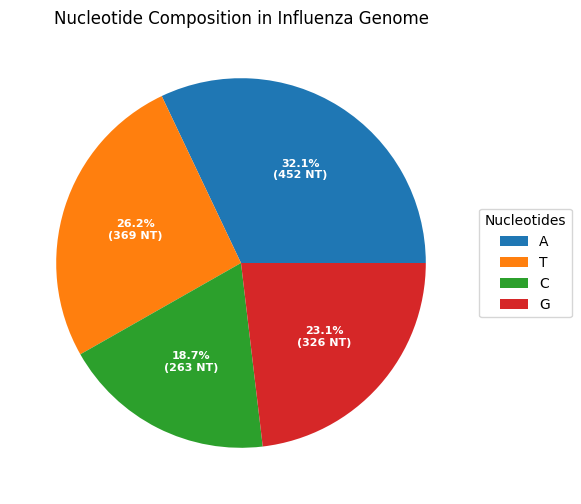

In [80]:
# Data for nucleotides
count_nucleotides = {
    'A': flu_dna.count('A'),
    'T': flu_dna.count('T'),
    'C': flu_dna.count('C'),
    'G': flu_dna.count('G')
}

# Extract data and labels
data = list(count_nucleotides.values())
nucleotides = list(count_nucleotides.keys())

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

def func(pct, allvalus):
    absolute = int(np.round(pct / 100. * np.sum(allvalus)))
    return f"{pct:.1f}%\n({absolute} NT)"

wedges, texts, autotexts = ax.pie(data, labels=nucleotides, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, nucleotides,
          title="Nucleotides",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Nucleotide Composition in Influenza Genome")

plt.show()

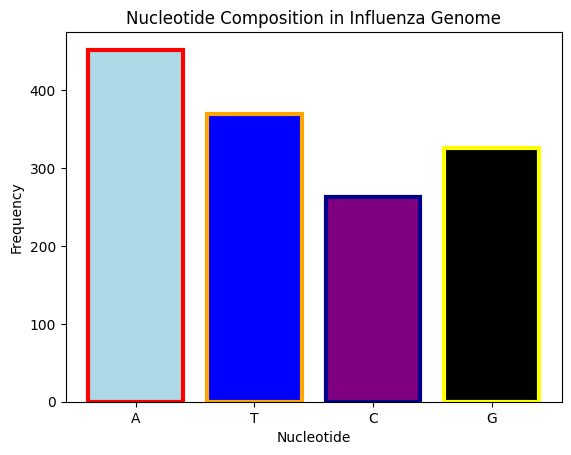

In [81]:
# Bar plot for visualization of Nucleotide Composition
color = ['lightblue', 'blue', 'purple', 'black']
edgecolor = ['red', 'orange', 'darkblue', 'yellow']

# Create bars
fig, ax = plt.subplots()
ax.bar(count_nucleotides.keys(), count_nucleotides.values(),
       color=color,
       edgecolor=edgecolor,
       linewidth=3)
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Composition in Influenza Genome')
# Show graph
plt.show()

In [82]:
# Transcribe flu DNA to RNA
flu_transcribe_dna_to_rna = flu_dna.transcribe()
print(flu_transcribe_dna_to_rna)

AUGAAUCCAAACCAAAAGAUAAUAACCAUUGGUUCAAUCUGUAUGACAAUUGGAAUGGCUAACUUCAUAUUACAAAUUGGAAACAUAAUCUCAAUAUGGAUUAGCCACUCAAUUCAACUUGGGAAUCAAAAUCAGAUUGAAACAUGCAAUCAAAGCGUCAUUACUUAUGAAAACAACACUUGGGUAAAUCAGACAUAUGUUAACAUCAGCAACACCAACUUUACUGCUGGAAAGUCAGUGGCUUCCGCGAGAAUAGUGGGCAAUUCCUCUCUCUGCCCCAUCAGUGGGUGGGCUAUAUACAGUAAAGACAACGGCAUAAGAAUUGGUUCCAAAGGAGAUGUGUUUGUCAUAAGGGAACCAUUCAUUUCAUGCUCCCCCUUGGAAUGCAGAACCUUUUUCUUGACUCAAGGAGCUUUGCUAAAUGACAAGCAUUCCAAUGGAACCGUUAAAGACAGAAGCCCAUAUCGAACCCUAAUGAGCUGUCCUAUUGGUGAAGUUCCCUCUCCAUACAACUCAAGAUUUGAGUCAGUCGCUUGGUCAGCAAGUGCUUGUCAUGAUGGCAUUAAUUGGCUAACAAUUGGAAUUUCUGGCCCAGACAAUGGGGCAGUGGCUGUGUUAAAGUACAACGGCAUAAUAACAGACACUAUCAAGAGUUGGAGAAACAAUAUAUUGAGAACACAAGAGUCUGAAUGUGCAUGUGUAAAUGGUUCUUGCUUUACUGUAAUGACCGAUGGACCAAGUAAUGGACAGGCCUCAUACAAGAUCUUCAGAAUAGAAAAGGGAAAGAUAGUCAAAUCAGUCGAAAUGAAUGCCCCUAAUUAUCACUAUGAGGAAUGCUCCUGCUAUCCUGAUUCUAGUGAAAUCACAUGUGUGUGCAGGGAUAACUGGCAUGGCUCGAAUCGACCGUGGGUGUCUUUCAACCAGAAUCUGGAAUAUCAGAUAGGAUACAUAUGCAGUGGGAUUUUUGGAGACAAUCCACGCCCUAUUGAUAAGACAGGCA

In [83]:
# Translate flu RNA to Amino Acid
flu_translate_rna_to_amino_acid = flu_transcribe_dna_to_rna.translate()
print(flu_translate_rna_to_amino_acid)

MNPNQKIITIGSICMTIGMANFILQIGNIISIWISHSIQLGNQNQIETCNQSVITYENNTWVNQTYVNISNTNFTAGKSVASARIVGNSSLCPISGWAIYSKDNGIRIGSKGDVFVIREPFISCSPLECRTFFLTQGALLNDKHSNGTVKDRSPYRTLMSCPIGEVPSPYNSRFESVAWSASACHDGINWLTIGISGPDNGAVAVLKYNGIITDTIKSWRNNILRTQESECACVNGSCFTVMTDGPSNGQASYKIFRIEKGKIVKSVEMNAPNYHYEECSCYPDSSEITCVCRDNWHGSNRPWVSFNQNLEYQIGYICSGIFGDNPRPIDKTGSCGPVSSNGAKGVKGFSFKYGNGVWIGRTKSISSRNGFEMIWDPNGWTGTDNNFSIKQDIVGINEWSGYSGSFVQHPELTGLDCIRPCFWVELIRGRPKENTIWTSGSCISFCGVNSDTVGWSWPDGAELPFTIDK*


In [84]:
# count uniq Amino Acid
uniq_amino_acid = Counter(flu_translate_rna_to_amino_acid)
for aa, num in uniq_amino_acid.most_common(): # Loop for print every AA
    if aa != "*":
        print(f"Amino Acid {aa} : {num}")
    else:
        print(f"Stop codon : {num}")

Amino Acid S : 52
Amino Acid I : 49
Amino Acid G : 46
Amino Acid N : 41
Amino Acid T : 28
Amino Acid V : 26
Amino Acid P : 22
Amino Acid K : 20
Amino Acid C : 20
Amino Acid E : 20
Amino Acid F : 19
Amino Acid D : 19
Amino Acid R : 18
Amino Acid A : 16
Amino Acid L : 16
Amino Acid W : 16
Amino Acid Q : 14
Amino Acid Y : 14
Amino Acid M : 7
Amino Acid H : 6
Stop codon : 1


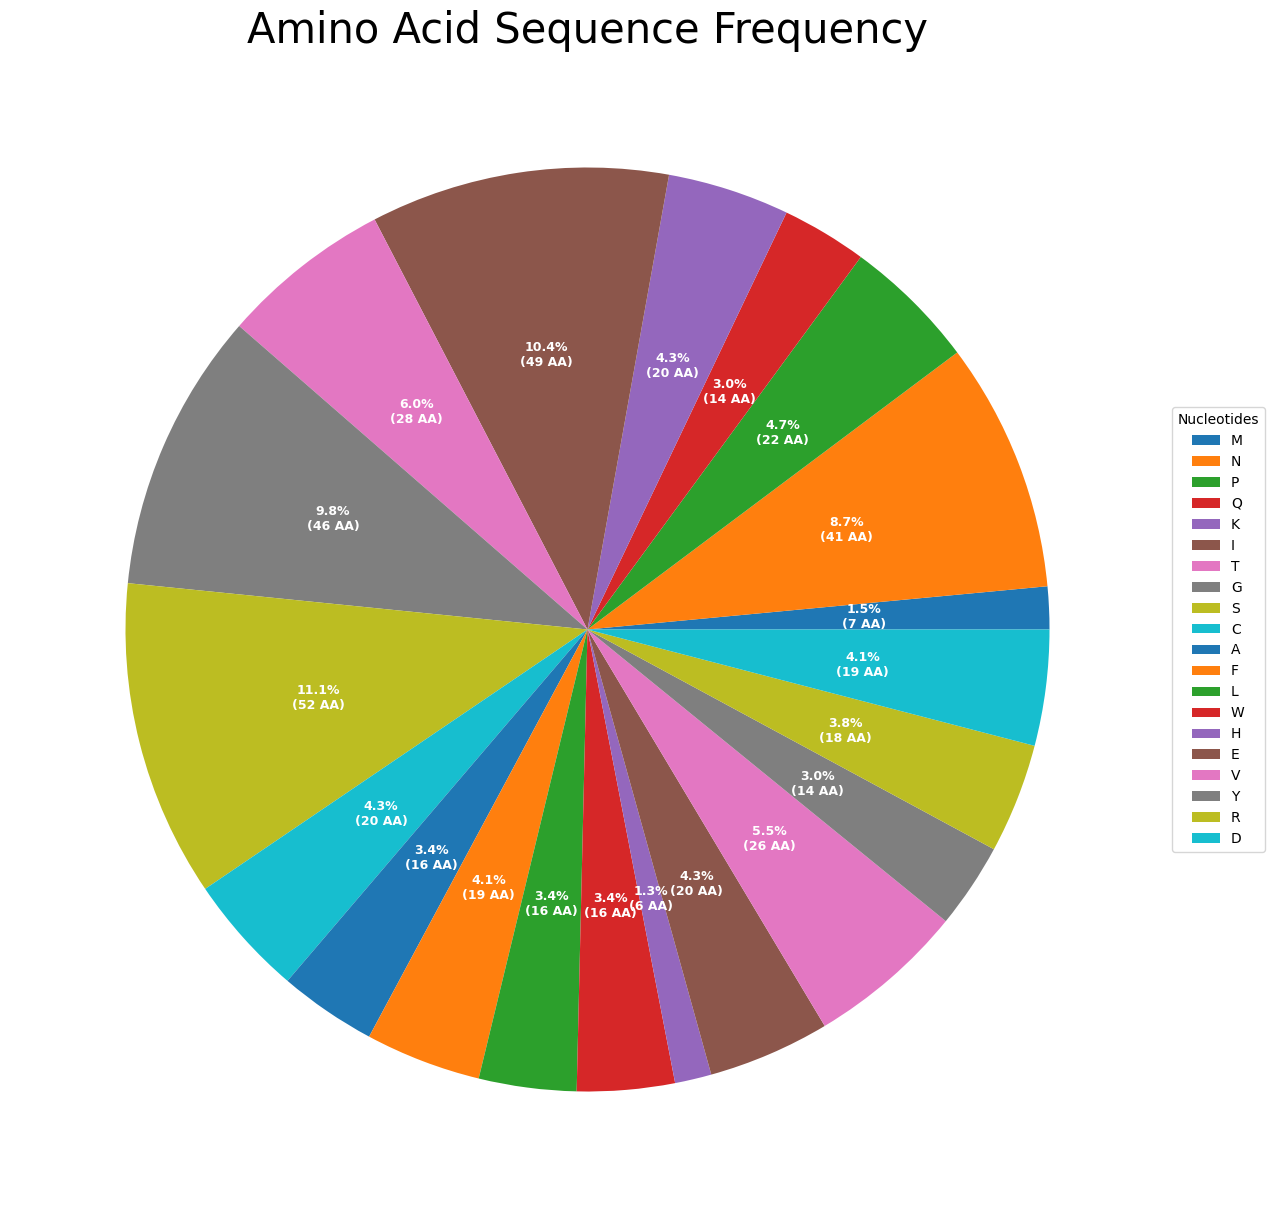

In [85]:
# Remove Unidentified Amino Acid before visualization
del uniq_amino_acid['*']

# Data for Amino Acid


# Extract data and labels
data = list(uniq_amino_acid.values())
nucleotides = list(uniq_amino_acid.keys())

# Create the pie chart
fig, ax = plt.subplots(figsize=(25, 15), subplot_kw=dict(aspect="equal"))

def func(pct, allvalus):
    absolute = int(np.round(pct / 100. * np.sum(allvalus)))
    return f"{pct:.1f}%\n({absolute} AA)"

wedges, texts, autotexts = ax.pie(data, labels=nucleotides, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, nucleotides,
          title="Nucleotides",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=9, weight="bold")

ax.set_title("Amino Acid Sequence Frequency", size=30)

plt.show()

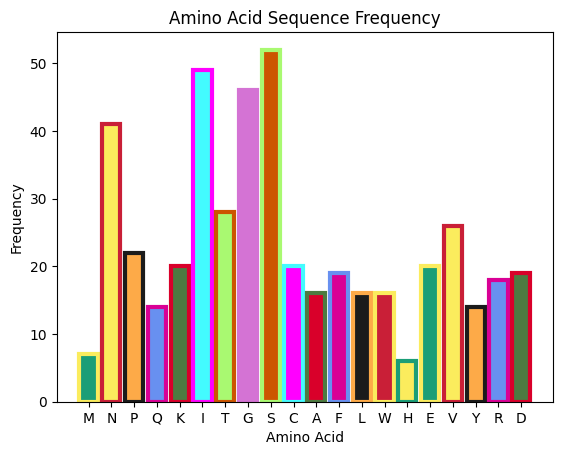

In [86]:
# Bar plot for visualization of Amino Acid
color = ['#1b9e77', '#fbec5d', '#fdaa48','#6890F0','#4d7b41', '#43fbff', '#a9f971', '#d473d4','#cc5500','#ff00ff', '#d9002a', '#d90095', '#1b1b1b','#c91f37','#fbec5d']
edge_color = list()
for colors in color[ : : -1]:
       edge_color.append(colors)

# Create bars
fig, ax = plt.subplots()
ax.bar(uniq_amino_acid.keys(), uniq_amino_acid.values(),
       color=color,
       edgecolor= edge_color,
       linewidth=3)
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Amino Acid Sequence Frequency')
# Show graph
plt.show()

# <p style="background-color:black; font-family:calibri; color:#fffb00; font-size:170%; text-align:center; border-radius:30px 30px;">3-7. Analysis segment 7</p>




In [87]:
try:
    Entrez.email = "seyedmilad.hashemichepi@gmail.com" # You should always tell NCBI who you are.
    handle = Entrez.efetch(db="nucleotide", id="HE589469.1", rettype="gb", retmode="text") # Get info
    recs = list(SeqIO.parse(handle, 'gb'))
except URLError: # handle errors
    print("Please check your internet connection or the URL you are trying to access.")
except InvalidIDError:
     print("Please check the ID you are trying to access.")
except InvalidDatabaseError:
    print("Please check the database you are trying to access.")
except InvalidEmailError:
    print("Please check the email you are trying to access.")
except InvalidTermError:
    print("Please check the term you are trying to access.")
except InvalidRetModeError:
     print("Please check the retmode you are trying to access.")
except InvalidRetTypeError:
    print("Please check the rettype you are trying to access.")
finally: # close the handle
    handle.close()
print(recs[0])

ID: HE589469.1
Name: HE589469
Description: Influenza A virus (A/swine/Pinar del Rio/3/2010(H1N1)) segment 7, complete genome
Database cross-references: BioProject:PRJNA37813
Number of features: 8
/molecule_type=RNA
/topology=linear
/data_file_division=VRL
/date=19-SEP-2011
/accessions=['HE589469']
/sequence_version=1
/keywords=['complete genome', 'complete viral segment']
/source=Influenza A virus (A/swine/Pinar del Rio/3/2010(H1N1))
/organism=Influenza A virus (A/swine/Pinar del Rio/3/2010(H1N1))
/taxonomy=['Viruses', 'Riboviria', 'Orthornavirae', 'Negarnaviricota', 'Polyploviricotina', 'Insthoviricetes', 'Articulavirales', 'Orthomyxoviridae', 'Alphainfluenzavirus', 'Alphainfluenzavirus influenzae']
/references=[Reference(title='Novel H1N1 swine influenza reassortant isolate in pigs derived from the pandemic H1N1/2009 influenza virus in Cuba', ...), Reference(title='Direct Submission', ...)]
Seq('ATGAGTCTTCTAACCGAGGTCGGAGCGTACGTTCTTTCTAGCATCACGTCAGGC...TAG')


In [88]:
# DNA seq
flu_dna = recs[0].seq
print(flu_dna)

ATGAGTCTTCTAACCGAGGTCGGAGCGTACGTTCTTTCTAGCATCACGTCAGGCCCACTCAAAGGTGAGATCGCGCAGAGACTGGAAAGTGTCTTTGCAGGAAAGCACACAGATCTTGAGGCTCTCATGGAATGGCTAAAGACAAGACCAATCTTGTCACCTCTGACTAAGGGAATTTTAGGATTTGTGTTCACGCTCACCGTGCCCAGTGAGCGAGGACTGCAGCGTAAACGCTTTGTCCAAAATGCCCTAAATGGGAATGGGGACCCGAACAACATGGATAGAGCAGTTAAACTATACAAGAAGCTCAAACGAGAAATAACGTTCCATGGGGCCAAGGAGGTGTCACTAAGCTATTCAACTGGTGCACTTGCCAGTTGCATGGGCCTCATATACAACAGGATGGGAACAGTGACCACAGAAGCTGCTTTTGGTCTAGTTTGTGCCACCTGTGAACAGATTGCTGATTCACAGCATCGGTCTCACAGACAGATGGCTACTACCACCAATCCACTAATCAGGCATGAAAACAGAATGGTGCTAGCTAGCACTACGGCAAAGGCTATGGAACAGATGGCTGGATCGAGTGAACAGGCAGCGGAGGCCATGGAGGTTGCTAATCAGACTAGGCAGATGGTACATGCAATGAGAACTATTGGGACTCATCCTAGCTCCAGTGCTGGTCTGAAAGATGACCTTCTTGAAAATTTGCAGGCCTACCAGAAGCGAATGGGAGTGCAGATGCAGCGATTCAAGTGATCCTTTCGTCATTGCAGCAAATATCATTGGGATCTTGCACCTGATATTGTGGATTACTGATCGTCTTTTTTTCAAATGTATTTATCGTCGCTTTAAATACGTTTTGGAAAGAGGGCCTTCTACGGAAGGAGTGCCTGAGTCCATGAGAGAAGAATATCAACAGGAACAGCAGAGTGCTGTGGATGTTGACGATGGTCATTTTGTCAACATAGAGCTAGAGTAAAAACTACCTTGTTGCTAC

In [89]:
# Length of dna
dna_length = len(flu_dna)
print(f"The genome of Influenza for segment 7 consists of {dna_length} nucleotides.")

The genome of Influenza for segment 7 consists of 1008 nucleotides.


In [90]:
# DNA molecular weight 
dna_mw = molecular_weight(flu_dna)
print(f"The molecular weight of genome in Influenza for segment 7 is {dna_mw:.2f} kilodaltons.")

The molecular weight of genome in Influenza for segment 7 is 312563.50 kilodaltons.


In [91]:
# GC_content
gc_con = gc_fraction(flu_dna)
print(f"The GC content of genome in Influenza for segment 7 is %{gc_con * 100:.0f} percent.")

The GC content of genome in Influenza for segment 7 is %47 percent.


In [92]:
# Number and percentage of nucleotides
count_nucleotides = {
    'A': flu_dna.count('A'),
    'T': flu_dna.count('T'),
    'C': flu_dna.count('C'),
    'G': flu_dna.count('G')
}
sum_of_all_nucleotide = sum(count_nucleotides.values()) # sum of all nucleotide
# Print result
print("total number of nucleotide :" ,sum_of_all_nucleotide)
print(f"Nucleotide A : {count_nucleotides['A']} ====> %{(count_nucleotides['A'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide T : {count_nucleotides['T']} ====> %{(count_nucleotides['T'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide C : {count_nucleotides['C']} ====> %{(count_nucleotides['C'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide G : {count_nucleotides['G']} ====> %{(count_nucleotides['G'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide GC : {count_nucleotides['G'] + count_nucleotides['C']} ====> %{((count_nucleotides['G'] + count_nucleotides['C']) / sum_of_all_nucleotide) * 100 :.0f} percent")

total number of nucleotide : 1008
Nucleotide A : 291 ====> %29 percent
Nucleotide T : 246 ====> %24 percent
Nucleotide C : 212 ====> %21 percent
Nucleotide G : 259 ====> %26 percent
Nucleotide GC : 471 ====> %47 percent


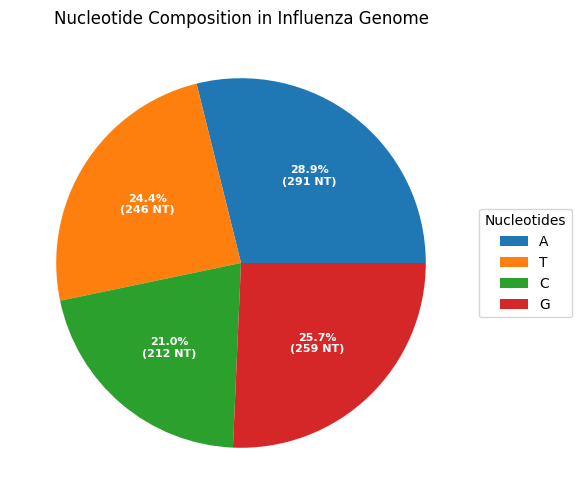

In [93]:
# Data for nucleotides
count_nucleotides = {
    'A': flu_dna.count('A'),
    'T': flu_dna.count('T'),
    'C': flu_dna.count('C'),
    'G': flu_dna.count('G')
}

# Extract data and labels
data = list(count_nucleotides.values())
nucleotides = list(count_nucleotides.keys())

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

def func(pct, allvalus):
    absolute = int(np.round(pct / 100. * np.sum(allvalus)))
    return f"{pct:.1f}%\n({absolute} NT)"

wedges, texts, autotexts = ax.pie(data, labels=nucleotides, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, nucleotides,
          title="Nucleotides",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Nucleotide Composition in Influenza Genome")

plt.show()

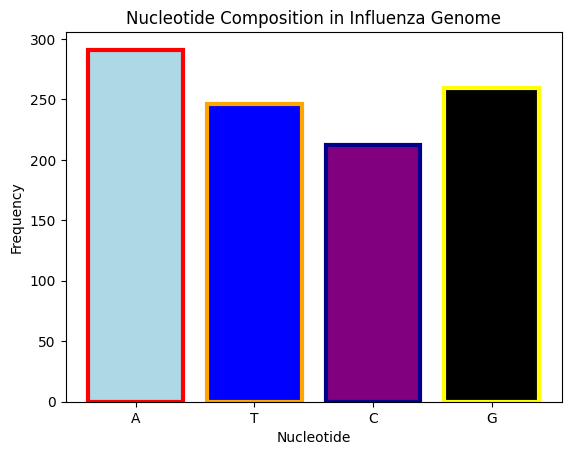

In [94]:
# Bar plot for visualization of Nucleotide Composition
color = ['lightblue', 'blue', 'purple', 'black']
edgecolor = ['red', 'orange', 'darkblue', 'yellow']

# Create bars
fig, ax = plt.subplots()
ax.bar(count_nucleotides.keys(), count_nucleotides.values(),
       color=color,
       edgecolor=edgecolor,
       linewidth=3)
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Composition in Influenza Genome')
# Show graph
plt.show()

In [95]:
# Transcribe flu DNA to RNA
flu_transcribe_dna_to_rna = flu_dna.transcribe()
print(flu_transcribe_dna_to_rna)

AUGAGUCUUCUAACCGAGGUCGGAGCGUACGUUCUUUCUAGCAUCACGUCAGGCCCACUCAAAGGUGAGAUCGCGCAGAGACUGGAAAGUGUCUUUGCAGGAAAGCACACAGAUCUUGAGGCUCUCAUGGAAUGGCUAAAGACAAGACCAAUCUUGUCACCUCUGACUAAGGGAAUUUUAGGAUUUGUGUUCACGCUCACCGUGCCCAGUGAGCGAGGACUGCAGCGUAAACGCUUUGUCCAAAAUGCCCUAAAUGGGAAUGGGGACCCGAACAACAUGGAUAGAGCAGUUAAACUAUACAAGAAGCUCAAACGAGAAAUAACGUUCCAUGGGGCCAAGGAGGUGUCACUAAGCUAUUCAACUGGUGCACUUGCCAGUUGCAUGGGCCUCAUAUACAACAGGAUGGGAACAGUGACCACAGAAGCUGCUUUUGGUCUAGUUUGUGCCACCUGUGAACAGAUUGCUGAUUCACAGCAUCGGUCUCACAGACAGAUGGCUACUACCACCAAUCCACUAAUCAGGCAUGAAAACAGAAUGGUGCUAGCUAGCACUACGGCAAAGGCUAUGGAACAGAUGGCUGGAUCGAGUGAACAGGCAGCGGAGGCCAUGGAGGUUGCUAAUCAGACUAGGCAGAUGGUACAUGCAAUGAGAACUAUUGGGACUCAUCCUAGCUCCAGUGCUGGUCUGAAAGAUGACCUUCUUGAAAAUUUGCAGGCCUACCAGAAGCGAAUGGGAGUGCAGAUGCAGCGAUUCAAGUGAUCCUUUCGUCAUUGCAGCAAAUAUCAUUGGGAUCUUGCACCUGAUAUUGUGGAUUACUGAUCGUCUUUUUUUCAAAUGUAUUUAUCGUCGCUUUAAAUACGUUUUGGAAAGAGGGCCUUCUACGGAAGGAGUGCCUGAGUCCAUGAGAGAAGAAUAUCAACAGGAACAGCAGAGUGCUGUGGAUGUUGACGAUGGUCAUUUUGUCAACAUAGAGCUAGAGUAAAAACUACCUUGUUGCUAC

In [96]:
# Translate flu RNA to Amino Acid
flu_translate_rna_to_amino_acid = flu_transcribe_dna_to_rna.translate()
print(flu_translate_rna_to_amino_acid)

MSLLTEVGAYVLSSITSGPLKGEIAQRLESVFAGKHTDLEALMEWLKTRPILSPLTKGILGFVFTLTVPSERGLQRKRFVQNALNGNGDPNNMDRAVKLYKKLKREITFHGAKEVSLSYSTGALASCMGLIYNRMGTVTTEAAFGLVCATCEQIADSQHRSHRQMATTTNPLIRHENRMVLASTTAKAMEQMAGSSEQAAEAMEVANQTRQMVHAMRTIGTHPSSSAGLKDDLLENLQAYQKRMGVQMQRFK*SFRHCSKYHWDLAPDIVDY*SSFFQMYLSSL*IRFGKRAFYGRSA*VHERRISTGTAECCGC*RWSFCQHRARVKTTLLLLS*


In [97]:
# count uniq Amino Acid
uniq_amino_acid = Counter(flu_translate_rna_to_amino_acid)
for aa, num in uniq_amino_acid.most_common(): # Loop for print every AA
    if aa != "*":
        print(f"Amino Acid {aa} : {num}")
    else:
        print(f"Stop codon : {num}")

Amino Acid L : 33
Amino Acid A : 30
Amino Acid S : 29
Amino Acid T : 25
Amino Acid R : 25
Amino Acid G : 22
Amino Acid E : 18
Amino Acid V : 17
Amino Acid K : 17
Amino Acid Q : 16
Amino Acid M : 15
Amino Acid F : 13
Amino Acid I : 12
Amino Acid H : 11
Amino Acid N : 10
Amino Acid Y : 9
Amino Acid D : 9
Amino Acid P : 8
Amino Acid C : 8
Stop codon : 6
Amino Acid W : 3


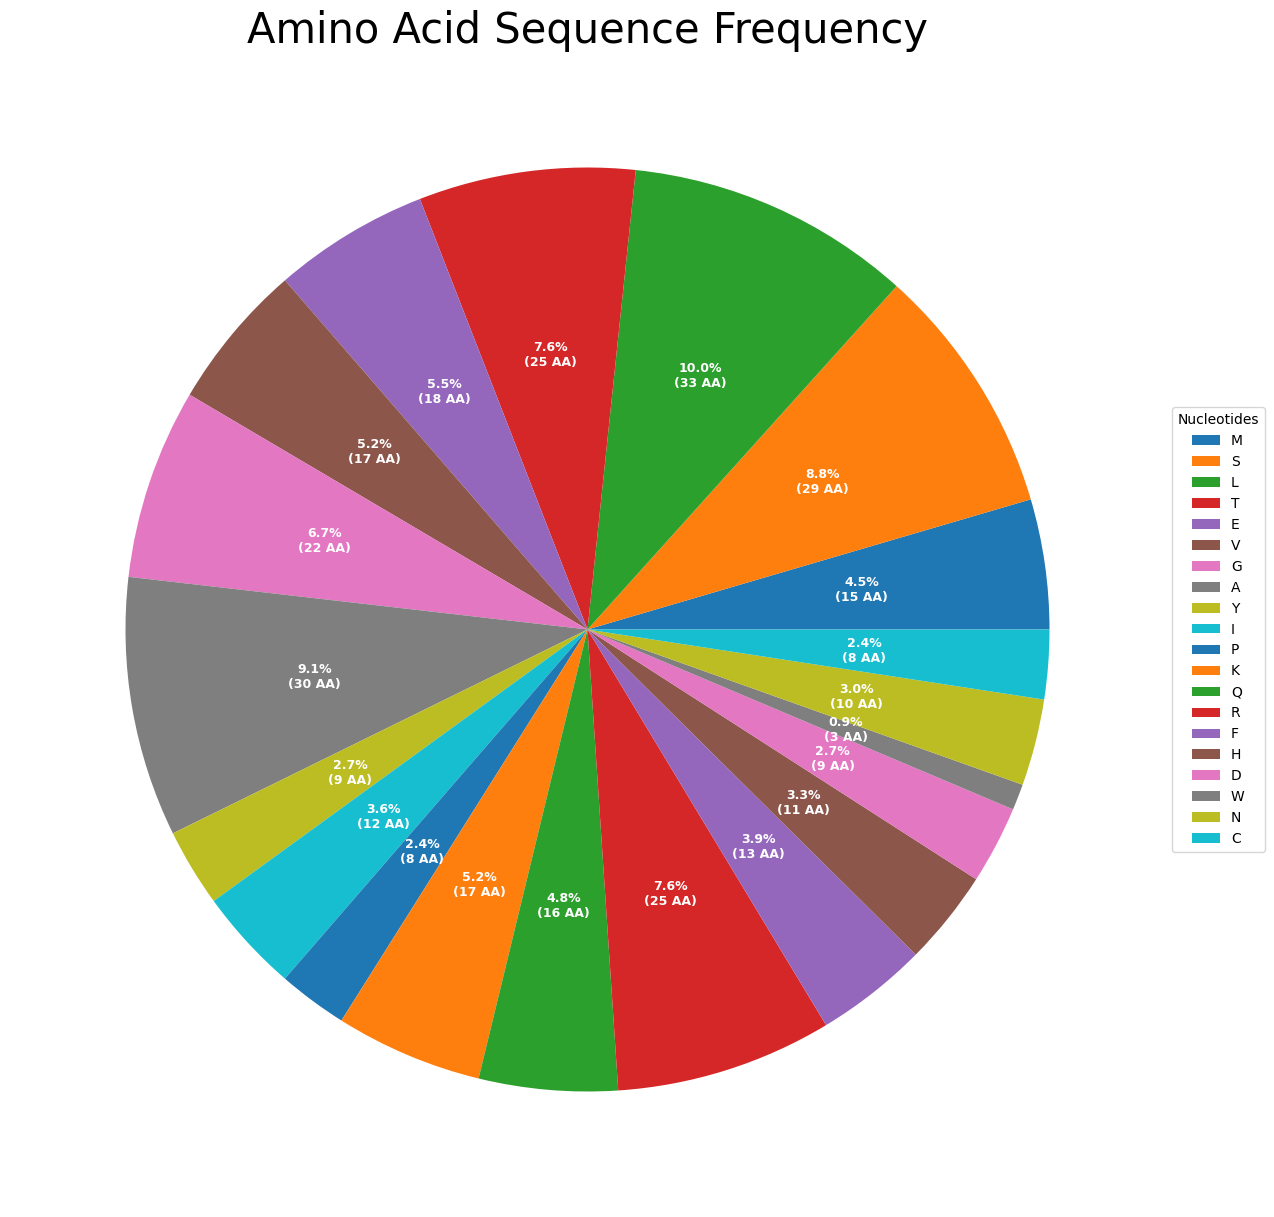

In [98]:
# Remove Unidentified Amino Acid before visualization
del uniq_amino_acid['*']

# Data for Amino Acid


# Extract data and labels
data = list(uniq_amino_acid.values())
nucleotides = list(uniq_amino_acid.keys())

# Create the pie chart
fig, ax = plt.subplots(figsize=(25, 15), subplot_kw=dict(aspect="equal"))

def func(pct, allvalus):
    absolute = int(np.round(pct / 100. * np.sum(allvalus)))
    return f"{pct:.1f}%\n({absolute} AA)"

wedges, texts, autotexts = ax.pie(data, labels=nucleotides, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, nucleotides,
          title="Nucleotides",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=9, weight="bold")

ax.set_title("Amino Acid Sequence Frequency", size=30)

plt.show()

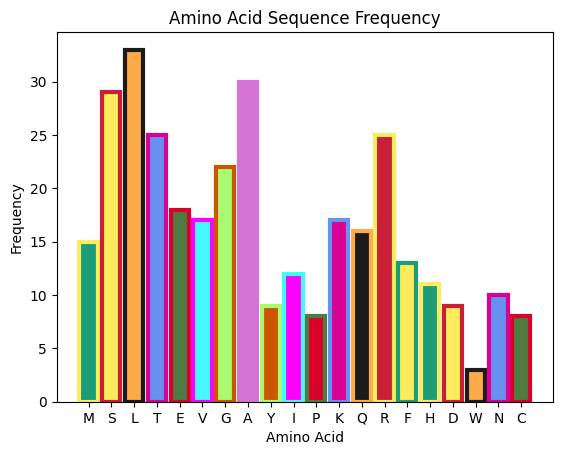

In [99]:
# Bar plot for visualization of Amino Acid
color = ['#1b9e77', '#fbec5d', '#fdaa48','#6890F0','#4d7b41', '#43fbff', '#a9f971', '#d473d4','#cc5500','#ff00ff', '#d9002a', '#d90095', '#1b1b1b','#c91f37','#fbec5d']
edge_color = list()
for colors in color[ : : -1]:
       edge_color.append(colors)

# Create bars
fig, ax = plt.subplots()
ax.bar(uniq_amino_acid.keys(), uniq_amino_acid.values(),
       color=color,
       edgecolor= edge_color,
       linewidth=3)
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Amino Acid Sequence Frequency')
# Show graph
plt.show()

# <p style="background-color:black; font-family:calibri; color:#fffb00; font-size:170%; text-align:center; border-radius:30px 30px;">3-8. Analysis segment 8</p>




In [100]:
try:
    Entrez.email = "seyedmilad.hashemichepi@gmail.com" # You should always tell NCBI who you are.
    handle = Entrez.efetch(db="nucleotide", id="HE589470.1", rettype="gb", retmode="text") # Get info
    recs = list(SeqIO.parse(handle, 'gb'))
except URLError: # handle errors
    print("Please check your internet connection or the URL you are trying to access.")
except InvalidIDError:
     print("Please check the ID you are trying to access.")
except InvalidDatabaseError:
    print("Please check the database you are trying to access.")
except InvalidEmailError:
    print("Please check the email you are trying to access.")
except InvalidTermError:
    print("Please check the term you are trying to access.")
except InvalidRetModeError:
     print("Please check the retmode you are trying to access.")
except InvalidRetTypeError:
    print("Please check the rettype you are trying to access.")
finally: # close the handle
    handle.close()
print(recs[0])

ID: HE589470.1
Name: HE589470
Description: Influenza A virus (A/swine/Pinar del Rio/3/2010(H1N1)) segment 8, complete genome
Database cross-references: BioProject:PRJNA37813
Number of features: 8
/molecule_type=RNA
/topology=linear
/data_file_division=VRL
/date=19-SEP-2011
/accessions=['HE589470']
/sequence_version=1
/keywords=['complete genome', 'complete viral segment']
/source=Influenza A virus (A/swine/Pinar del Rio/3/2010(H1N1))
/organism=Influenza A virus (A/swine/Pinar del Rio/3/2010(H1N1))
/taxonomy=['Viruses', 'Riboviria', 'Orthornavirae', 'Negarnaviricota', 'Polyploviricotina', 'Insthoviricetes', 'Articulavirales', 'Orthomyxoviridae', 'Alphainfluenzavirus', 'Alphainfluenzavirus influenzae']
/references=[Reference(title='Novel H1N1 swine influenza reassortant isolate in pigs derived from the pandemic H1N1/2009 influenza virus in Cuba', ...), Reference(title='Direct Submission', ...)]
Seq('ATGGACTCCAACACCATGTCAAGCTTTCAGGTAGACTGTTTCCTTTGGCATATC...TAC')


In [101]:
# DNA seq
flu_dna = recs[0].seq
print(flu_dna)

ATGGACTCCAACACCATGTCAAGCTTTCAGGTAGACTGTTTCCTTTGGCATATCCGCAAGCGATTTGCAGACAATGGATTGGGTGATGCCCCATTCCTTGATCGGCTCCGCCGAGATCAAAAGTCCTTAAAAGGAAGAGGCAACACCCTTGGCCTCGATATCGAAACAGCCACTCTTGTTGGGAAACAAATCGTGGAATGGATCTTGAAAGAGGAATCCAGCGAAACACTTAGAATGACAATTGCATCTGTACCTACTTCGCGCTACCTTTCTGACATGACCCTCGAGGAAATGTCACTAGACTGGTTCATGCTCATCCCTAGGCAGAAGATAATAGGCCCTCTTTGCGTGCGATTGGACCAAGCGATCATGGAAAAGAACATAGTACTGAAAGCGAACTTCAGTGTAATCTTTAACCGATTAGAGACCTTGATACTACTAAGGGCTTTCACTGAGGAGGGAGCAATAGTTGGAGAAATTTCACCATTACCTTCTCTTCCAGGACATACTTATGAGGATGTCAAAAATGCAGTTGGGGTCCTCATCGGAGGACTTGAATGGAATGGTAACACGGTTCGAGTCTCTGAAAATATACAGAGATTCGCTTGGAGAAACTGTGATGAGAATGGGAGACCTTCACTACTTCCAGAGCAGAAATGAAAAGTGGCGAGAGCAATTGGGACAGAAATTTGAGGAAATAAGATGGTTAATTGAAGAAATGCGGCACAGATTGAAAGCGACAGAGAATAGTTTCGAACAAATAACATTTATGCAAGCCTTACAACTACTGCTTGAAGTAGAACAAGAGATAAGAGCTTTCTCGTTTCAGCTTATTTAATGATAAAAAACACCCTTGTTTCTAC


In [102]:
# Length of dna
dna_length = len(flu_dna)
print(f"The genome of Influenza for segment 8 consists of {dna_length} nucleotides.")

The genome of Influenza for segment 8 consists of 863 nucleotides.


In [103]:
# DNA molecular weight 
dna_mw = molecular_weight(flu_dna)
print(f"The molecular weight of genome in Influenza for segment 8 is {dna_mw:.2f} kilodaltons.")

The molecular weight of genome in Influenza for segment 8 is 267355.94 kilodaltons.


In [104]:
# GC_content
gc_con = gc_fraction(flu_dna)
print(f"The GC content of genome in Influenza for segment 8 is %{gc_con * 100:.0f} percent.")

The GC content of genome in Influenza for segment 8 is %43 percent.


In [105]:
# Number and percentage of nucleotides
count_nucleotides = {
    'A': flu_dna.count('A'),
    'T': flu_dna.count('T'),
    'C': flu_dna.count('C'),
    'G': flu_dna.count('G')
}
sum_of_all_nucleotide = sum(count_nucleotides.values()) # sum of all nucleotide
# Print result
print("total number of nucleotide :" ,sum_of_all_nucleotide)
print(f"Nucleotide A : {count_nucleotides['A']} ====> %{(count_nucleotides['A'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide T : {count_nucleotides['T']} ====> %{(count_nucleotides['T'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide C : {count_nucleotides['C']} ====> %{(count_nucleotides['C'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide G : {count_nucleotides['G']} ====> %{(count_nucleotides['G'] / sum_of_all_nucleotide) * 100 :.0f} percent")
print(f"Nucleotide GC : {count_nucleotides['G'] + count_nucleotides['C']} ====> %{((count_nucleotides['G'] + count_nucleotides['C']) / sum_of_all_nucleotide) * 100 :.0f} percent")

total number of nucleotide : 863
Nucleotide A : 275 ====> %32 percent
Nucleotide T : 216 ====> %25 percent
Nucleotide C : 174 ====> %20 percent
Nucleotide G : 198 ====> %23 percent
Nucleotide GC : 372 ====> %43 percent


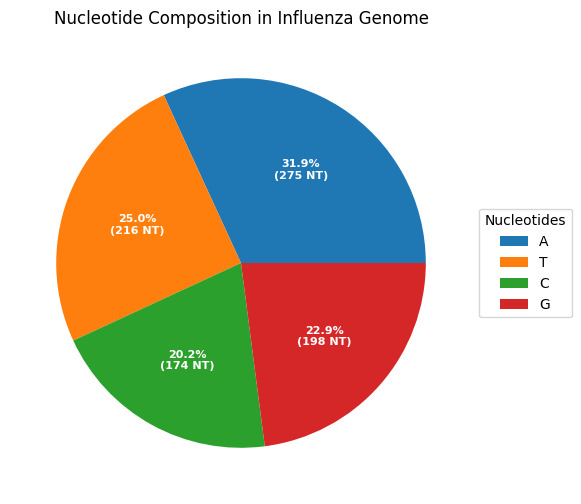

In [106]:
# Data for nucleotides
count_nucleotides = {
    'A': flu_dna.count('A'),
    'T': flu_dna.count('T'),
    'C': flu_dna.count('C'),
    'G': flu_dna.count('G')
}

# Extract data and labels
data = list(count_nucleotides.values())
nucleotides = list(count_nucleotides.keys())

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

def func(pct, allvalus):
    absolute = int(np.round(pct / 100. * np.sum(allvalus)))
    return f"{pct:.1f}%\n({absolute} NT)"

wedges, texts, autotexts = ax.pie(data, labels=nucleotides, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, nucleotides,
          title="Nucleotides",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Nucleotide Composition in Influenza Genome")

plt.show()

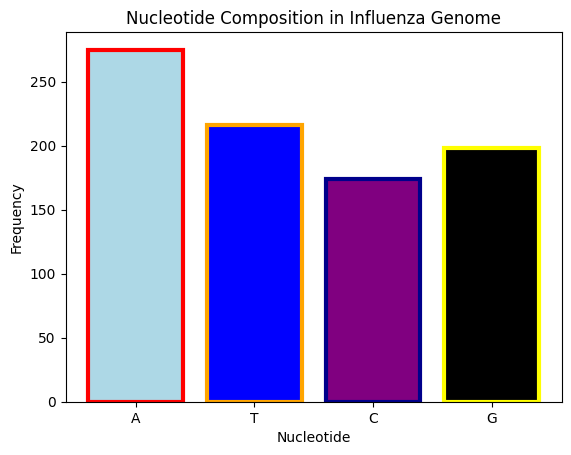

In [107]:
# Bar plot for visualization of Nucleotide Composition
color = ['lightblue', 'blue', 'purple', 'black']
edgecolor = ['red', 'orange', 'darkblue', 'yellow']

# Create bars
fig, ax = plt.subplots()
ax.bar(count_nucleotides.keys(), count_nucleotides.values(),
       color=color,
       edgecolor=edgecolor,
       linewidth=3)
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Composition in Influenza Genome')
# Show graph
plt.show()

In [108]:
# Translate flu RNA to Amino Acid
flu_translate_rna_to_amino_acid = flu_transcribe_dna_to_rna.translate()
print(flu_translate_rna_to_amino_acid)

MSLLTEVGAYVLSSITSGPLKGEIAQRLESVFAGKHTDLEALMEWLKTRPILSPLTKGILGFVFTLTVPSERGLQRKRFVQNALNGNGDPNNMDRAVKLYKKLKREITFHGAKEVSLSYSTGALASCMGLIYNRMGTVTTEAAFGLVCATCEQIADSQHRSHRQMATTTNPLIRHENRMVLASTTAKAMEQMAGSSEQAAEAMEVANQTRQMVHAMRTIGTHPSSSAGLKDDLLENLQAYQKRMGVQMQRFK*SFRHCSKYHWDLAPDIVDY*SSFFQMYLSSL*IRFGKRAFYGRSA*VHERRISTGTAECCGC*RWSFCQHRARVKTTLLLLS*


In [109]:
# count uniq Amino Acid
uniq_amino_acid = Counter(flu_translate_rna_to_amino_acid)
for aa, num in uniq_amino_acid.most_common(): # Loop for print every AA
    if aa != "*":
        print(f"Amino Acid {aa} : {num}")
    else:
        print(f"Stop codon : {num}")

Amino Acid L : 33
Amino Acid A : 30
Amino Acid S : 29
Amino Acid T : 25
Amino Acid R : 25
Amino Acid G : 22
Amino Acid E : 18
Amino Acid V : 17
Amino Acid K : 17
Amino Acid Q : 16
Amino Acid M : 15
Amino Acid F : 13
Amino Acid I : 12
Amino Acid H : 11
Amino Acid N : 10
Amino Acid Y : 9
Amino Acid D : 9
Amino Acid P : 8
Amino Acid C : 8
Stop codon : 6
Amino Acid W : 3


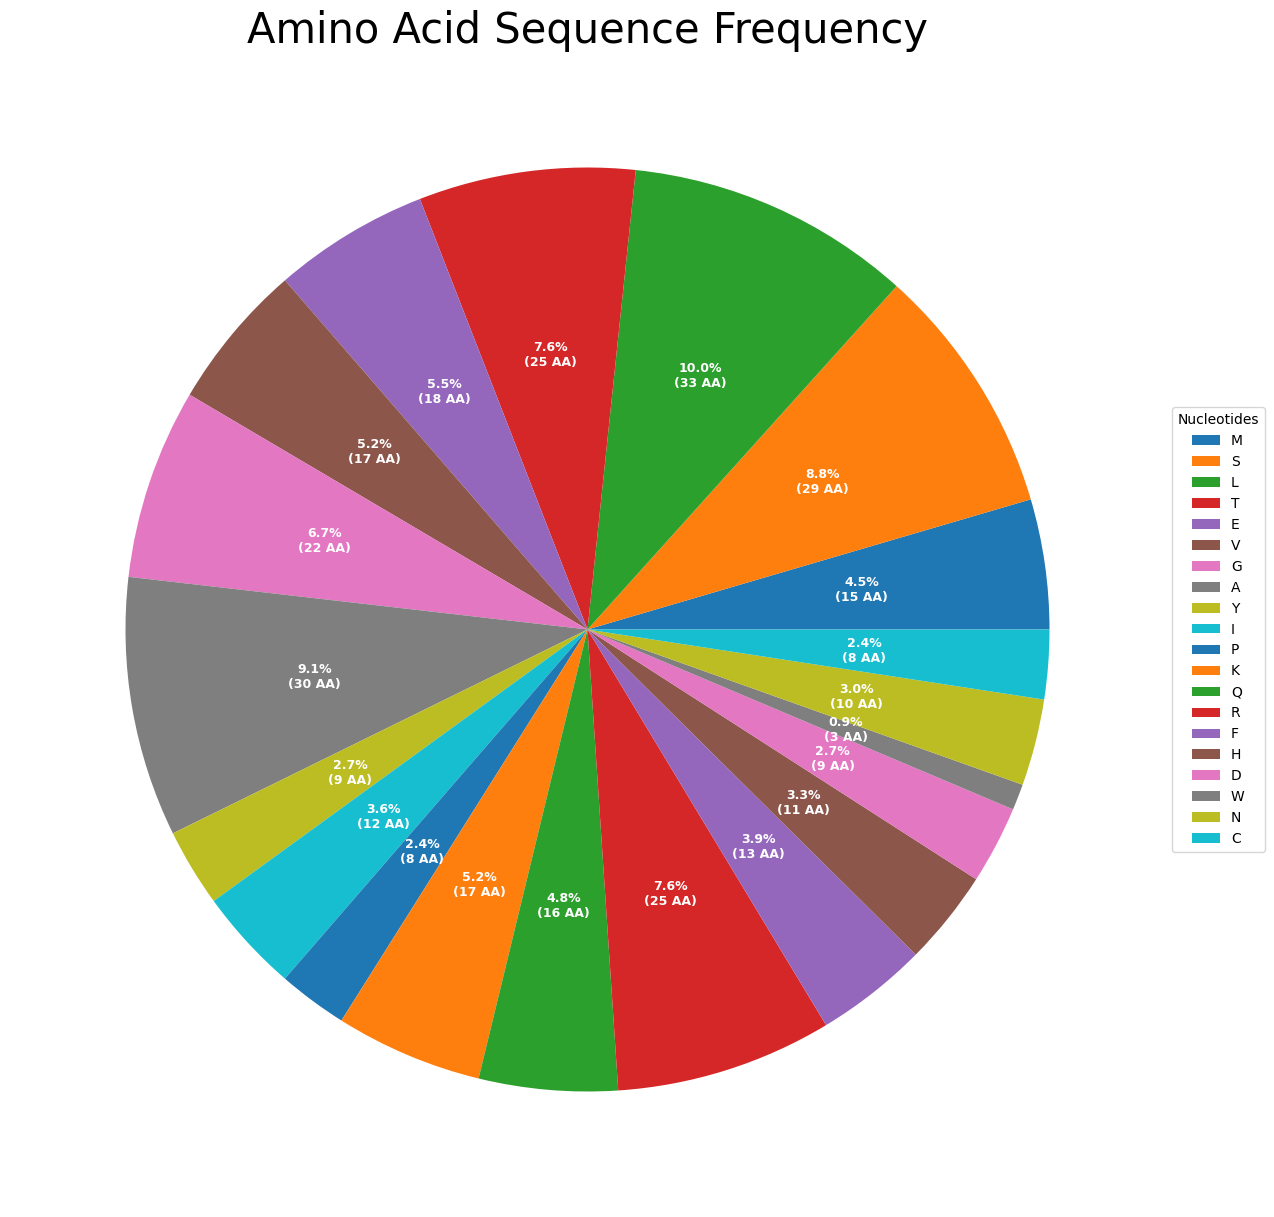

In [110]:
# Remove Unidentified Amino Acid before visualization
del uniq_amino_acid['*']

# Data for Amino Acid


# Extract data and labels
data = list(uniq_amino_acid.values())
nucleotides = list(uniq_amino_acid.keys())

# Create the pie chart
fig, ax = plt.subplots(figsize=(25, 15), subplot_kw=dict(aspect="equal"))

def func(pct, allvalus):
    absolute = int(np.round(pct / 100. * np.sum(allvalus)))
    return f"{pct:.1f}%\n({absolute} AA)"

wedges, texts, autotexts = ax.pie(data, labels=nucleotides, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, nucleotides,
          title="Nucleotides",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=9, weight="bold")

ax.set_title("Amino Acid Sequence Frequency", size=30)

plt.show()

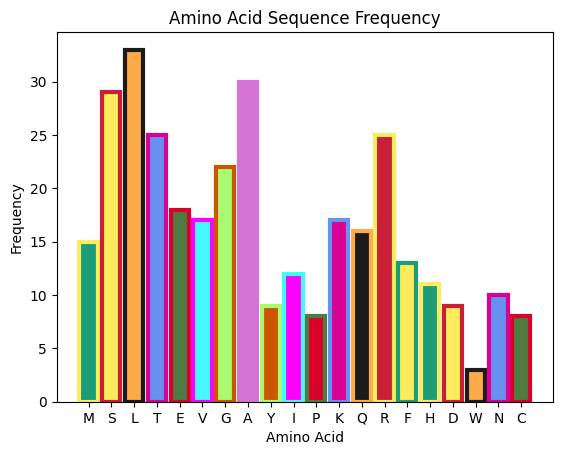

In [111]:
# Bar plot for visualization of Amino Acid
color = ['#1b9e77', '#fbec5d', '#fdaa48','#6890F0','#4d7b41', '#43fbff', '#a9f971', '#d473d4','#cc5500','#ff00ff', '#d9002a', '#d90095', '#1b1b1b','#c91f37','#fbec5d']
edge_color = list()
for colors in color[ : : -1]:
       edge_color.append(colors)

# Create bars
fig, ax = plt.subplots()
ax.bar(uniq_amino_acid.keys(), uniq_amino_acid.values(),
       color=color,
       edgecolor= edge_color,
       linewidth=3)
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Amino Acid Sequence Frequency')
# Show graph
plt.show()